In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from pylab import rcParams
import plotly.express as px
%matplotlib inline
import os

# 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [3]:
df=pd.read_excel('compactiv.xlsx')

In [4]:
df.head(5)

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [6]:
df.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

In [7]:
df.shape

(8192, 22)

In [8]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [9]:
df.isna().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [10]:
df.isnull().sum()/df.isnull().sum().sum()*100

lread        0.000000
lwrite       0.000000
scall        0.000000
sread        0.000000
swrite       0.000000
fork         0.000000
exec         0.000000
rchar       87.394958
wchar       12.605042
pgout        0.000000
ppgout       0.000000
pgfree       0.000000
pgscan       0.000000
atch         0.000000
pgin         0.000000
ppgin        0.000000
pflt         0.000000
vflt         0.000000
runqsz       0.000000
freemem      0.000000
freeswap     0.000000
usr          0.000000
dtype: float64

# So we can identify the the rchar features has been 87% null are present in the compactiv. so we can drop the feature.

In [11]:
df=df.drop("rchar", axis=1)

In [12]:
df

lread  lwrite  scall  sread  swrite  fork  exec    wchar  pgout  ppgout  \
0         1       0   2147     79      68   0.2  0.20  53995.0   0.00    0.00   
1         0       0    170     18      21   0.2  0.20   8385.0   0.00    0.00   
2        15       3   2162    159     119   2.0  2.40  31950.0   0.00    0.00   
3         0       0    160     12      16   0.2  0.20   8670.0   0.00    0.00   
4         5       1    330     39      38   0.4  0.40  12185.0   0.00    0.00   
...     ...     ...    ...    ...     ...   ...   ...      ...    ...     ...   
8187     16      12   3009    360     244   1.6  5.81  85282.0   8.02   20.64   
8188      4       0   1596    170     146   2.4  1.80  41764.0   3.80    4.80   
8189     16       5   3116    289     190   0.6  0.60  52640.0   0.40    0.60   
8190     32      45   5180    254     179   1.2  1.20  29505.0   1.40    1.60   
8191      2       0    985     55      46   1.6  4.80  22256.0   0.00    0.00   

      ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz freemem  \
0     ...    0.00   0.0   1.60   2.60   16.00   26.40      CPU_Bound    4670   
1     ...    0.00   0.0   0.00   0.00   15.63   16.83  Not_CPU_Bound    7278   
2     ...    0.00   1.2   6.00   9.40  150.20  220.20  Not_CPU_Bound     702   
3     ...    0.00   0.0   0.20   0.20   15.60   16.80  Not_CPU_Bound    7248   
4     ...    0.00   0.0   1.00   1.20   37.80   47.60  Not_CPU_Bound     633   
...   ...     ...   ...    ...    ...     ...     ...            ...     ...   
8187  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound     387   
8188  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound     263   
8189  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound     400   
8190  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound     141   
8191  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound     659   

      freeswap  usr  
0      1730946   95  
1      1869002   97  
2      1021237   87  
3      1863704   98  
4      1760253   90  
...        ...  ...  
8187    986647   80  
8188   1055742   90  
8189    969106   87  
8190   1022458   83  
8191   1756514   94  

[8192 rows x 21 columns]

In [13]:
df.describe(include = 'all').T

count unique            top  freq            mean            std  \
lread     8192.0    NaN            NaN   NaN       19.559692      53.353799   
lwrite    8192.0    NaN            NaN   NaN       13.106201      29.891726   
scall     8192.0    NaN            NaN   NaN     2306.318237    1633.617322   
sread     8192.0    NaN            NaN   NaN       210.47998     198.980146   
swrite    8192.0    NaN            NaN   NaN      150.058228      160.47898   
fork      8192.0    NaN            NaN   NaN        1.884554       2.479493   
exec      8192.0    NaN            NaN   NaN        2.791998       5.212456   
wchar     8177.0    NaN            NaN   NaN    95902.992785  140841.707911   
pgout     8192.0    NaN            NaN   NaN        2.285317       5.307038   
ppgout    8192.0    NaN            NaN   NaN        5.977229       15.21459   
pgfree    8192.0    NaN            NaN   NaN       11.919712       32.36352   
pgscan    8192.0    NaN            NaN   NaN       21.526849       71.14134   
atch      8192.0    NaN            NaN   NaN        1.127505       5.708347   
pgin      8192.0    NaN            NaN   NaN         8.27796      13.874978   
ppgin     8192.0    NaN            NaN   NaN       12.388586      22.281318   
pflt      8192.0    NaN            NaN   NaN      109.793799     114.419221   
vflt      8192.0    NaN            NaN   NaN      185.315796     191.000603   
runqsz      8192      2  Not_CPU_Bound  4331             NaN            NaN   
freemem   8192.0    NaN            NaN   NaN     1763.456299    2482.104511   
freeswap  8192.0    NaN            NaN   NaN  1328125.959839  422019.426957   
usr       8192.0    NaN            NaN   NaN       83.968872      18.401905   

             min        25%        50%        75%        max  
lread        0.0        2.0        7.0       20.0     1845.0  
lwrite       0.0        0.0        1.0       10.0      575.0  
scall      109.0     1012.0     2051.5    3317.25    12493.0  
sread        6.0       86.0      166.0      279.0     5318.0  
swrite       7.0       63.0      117.0      185.0     5456.0  
fork         0.0        0.4        0.8        2.2      20.12  
exec         0.0        0.2        1.2        2.8      59.56  
wchar     1498.0    22916.0    46619.0   106101.0  1801623.0  
pgout        0.0        0.0        0.0        2.4      81.44  
ppgout       0.0        0.0        0.0        4.2      184.2  
pgfree       0.0        0.0        0.0        5.0      523.0  
pgscan       0.0        0.0        0.0        0.0     1237.0  
atch         0.0        0.0        0.0        0.6     211.58  
pgin         0.0        0.6        2.8      9.765      141.2  
ppgin        0.0        0.6        3.8       13.8     292.61  
pflt         0.0       25.0       63.8      159.6      899.8  
vflt         0.2       45.4      120.4      251.8     1365.0  
runqsz       NaN        NaN        NaN        NaN        NaN  
freemem     55.0      231.0      579.0    2002.25    12027.0  
freeswap     2.0  1042623.5  1289289.5  1730379.5  2243187.0  
usr          0.0       81.0       89.0       94.0       99.0

# Check the duplicates

In [14]:
df.duplicated().sum()

0

# Check for object datatype

In [15]:
df.select_dtypes(include='object').head()

runqsz
0      CPU_Bound
1  Not_CPU_Bound
2  Not_CPU_Bound
3  Not_CPU_Bound
4  Not_CPU_Bound

In [16]:
df["runqsz"] = df["runqsz"].astype('category')

In [17]:
df["runqsz"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8192 entries, 0 to 8191
Series name: runqsz
Non-Null Count  Dtype   
--------------  -----   
8192 non-null   category
dtypes: category(1)
memory usage: 8.2 KB


In [18]:
df["runqsz"]=df["runqsz"].cat.codes.astype(np.int64)

In [19]:
df["runqsz"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8192 entries, 0 to 8191
Series name: runqsz
Non-Null Count  Dtype
--------------  -----
8192 non-null   int64
dtypes: int64(1)
memory usage: 64.1 KB


# We converted the categorical variable into numerical variable for further analysis 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   wchar     8177 non-null   float64
 8   pgout     8192 non-null   float64
 9   ppgout    8192 non-null   float64
 10  pgfree    8192 non-null   float64
 11  pgscan    8192 non-null   float64
 12  atch      8192 non-null   float64
 13  pgin      8192 non-null   float64
 14  ppgin     8192 non-null   float64
 15  pflt      8192 non-null   float64
 16  vflt      8192 non-null   float64
 17  runqsz    8192 non-null   int64  
 18  freemem   8192 non-null   int64  
 19  freeswap  8192 non-null   int64  
 20  usr       8192 non-null   int6

# Let's we perform the univariate analysis

# Check the skew in percentagewise

In [21]:
skewness = df.skew()
skewness_percentage = (skewness / df.shape[0]) * 100

In [22]:
skewness_percentage

lread       0.169652
lwrite      0.064424
scall       0.011017
sread       0.066644
swrite      0.117259
fork        0.027462
exec        0.049673
wchar       0.046968
pgout       0.061853
ppgout      0.057134
pgfree      0.058205
pgscan      0.070965
atch        0.262964
pgin        0.039580
ppgin       0.047641
pflt        0.021000
vflt        0.021208
runqsz     -0.001403
freemem     0.022065
freeswap   -0.009664
usr        -0.041708
dtype: float64

# Histogram and Boxplot 

lread
Skew: 13.9
lwrite
Skew: 5.28
scall
Skew: 0.9
sread
Skew: 5.46
swrite
Skew: 9.61
fork
Skew: 2.25
exec
Skew: 4.07
wchar
Skew: 3.85
pgout
Skew: 5.07
ppgout
Skew: 4.68
pgfree
Skew: 4.77
pgscan
Skew: 5.81
atch
Skew: 21.54
pgin
Skew: 3.24
ppgin
Skew: 3.9
pflt
Skew: 1.72
vflt
Skew: 1.74
runqsz
Skew: -0.11
freemem
Skew: 1.81
freeswap
Skew: -0.79
usr
Skew: -3.42


C:\Users\admin\AppData\Local\Temp\ipykernel_5748\2475598506.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 4))


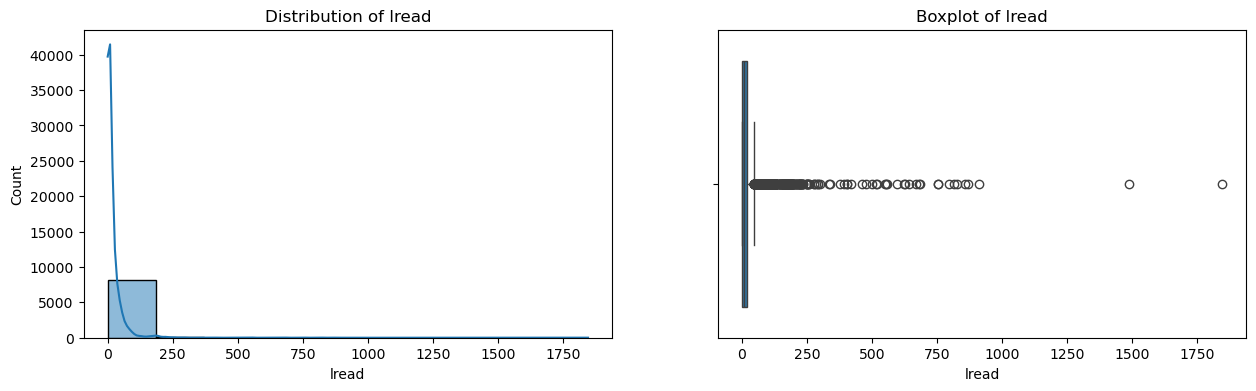

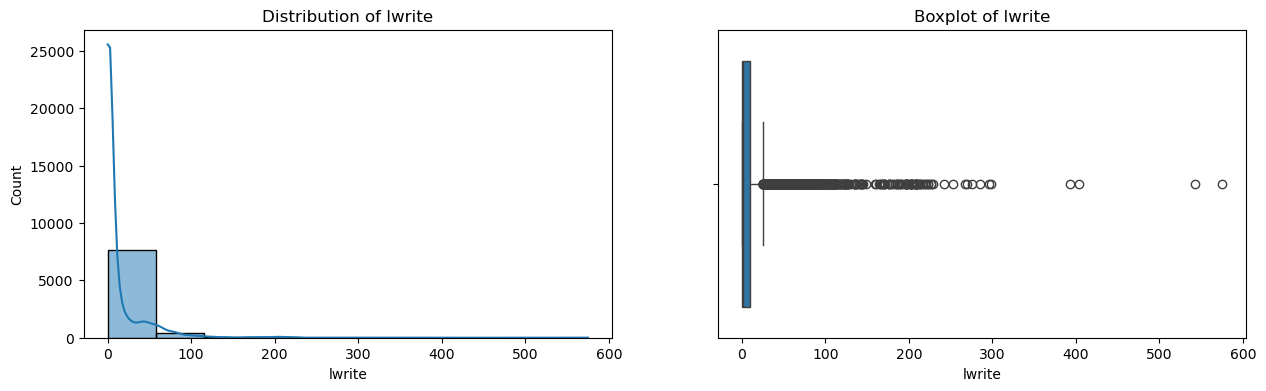

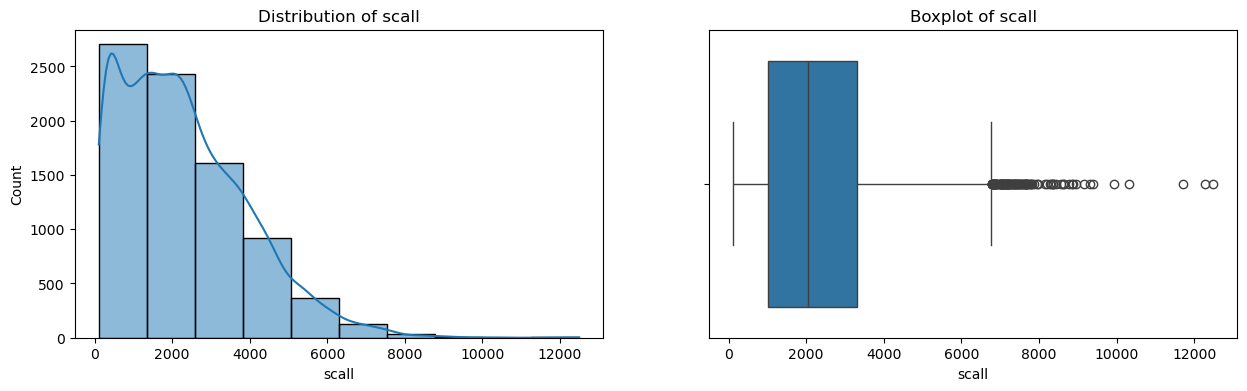

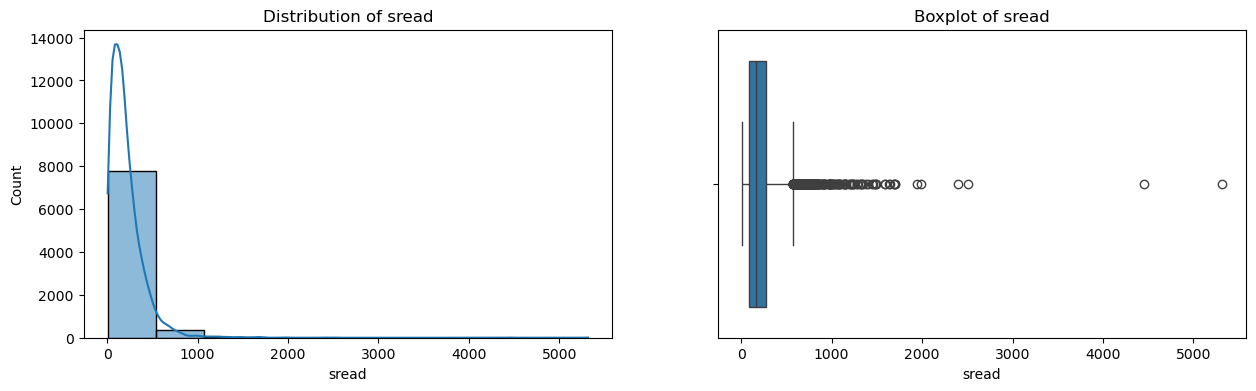

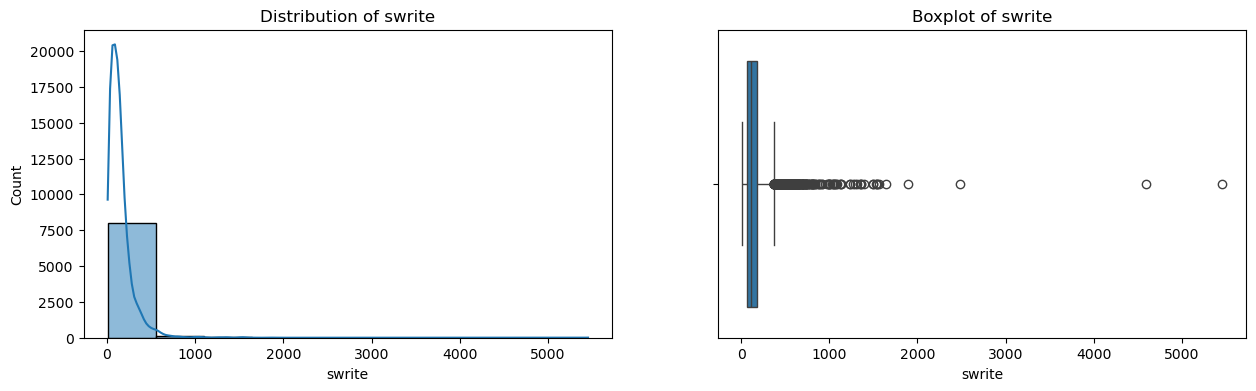

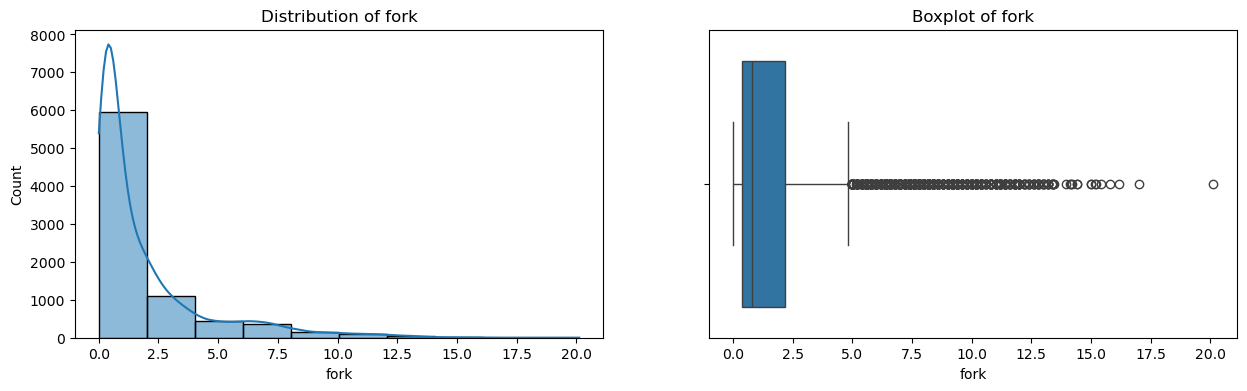

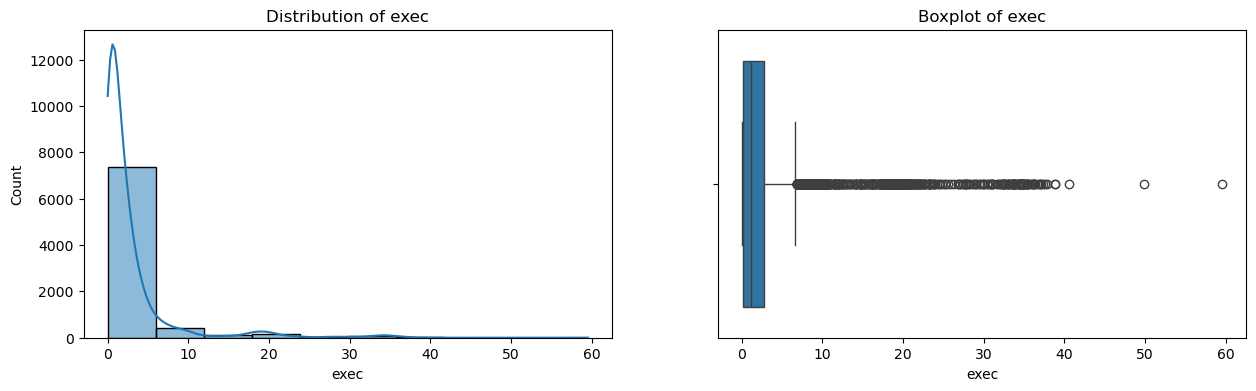

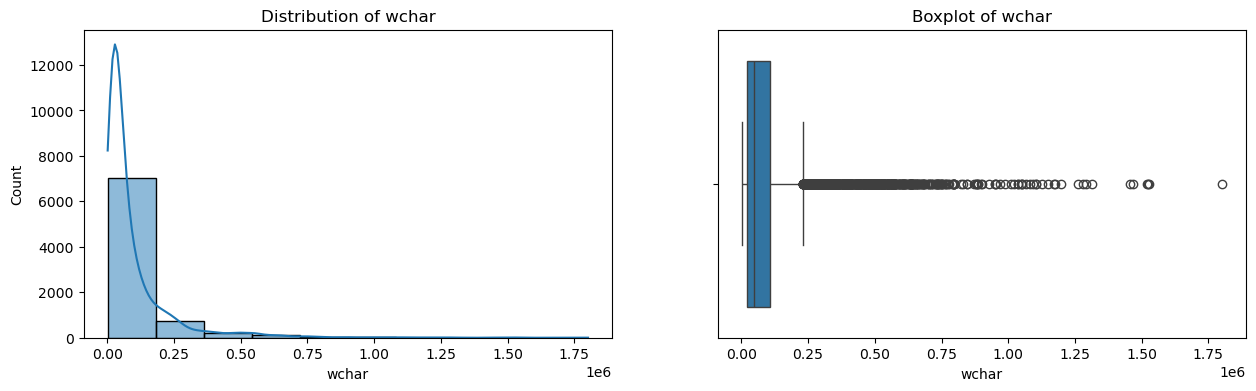

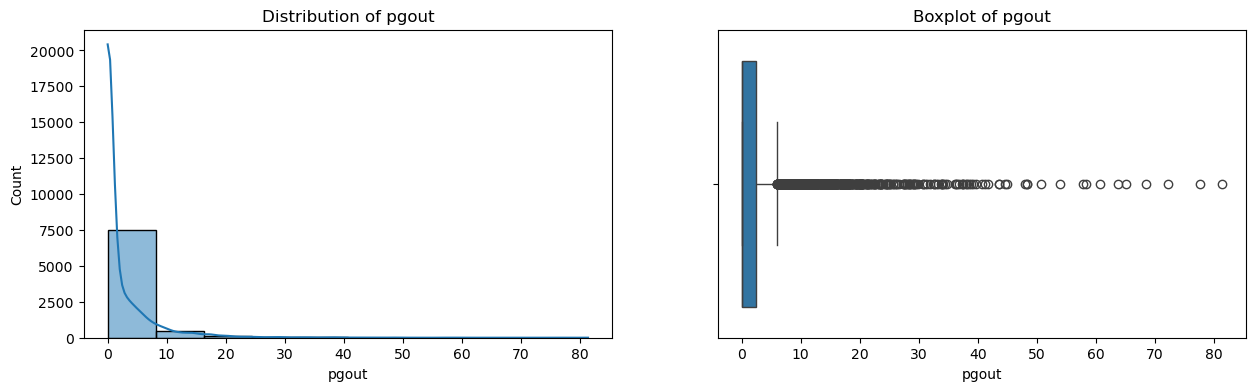

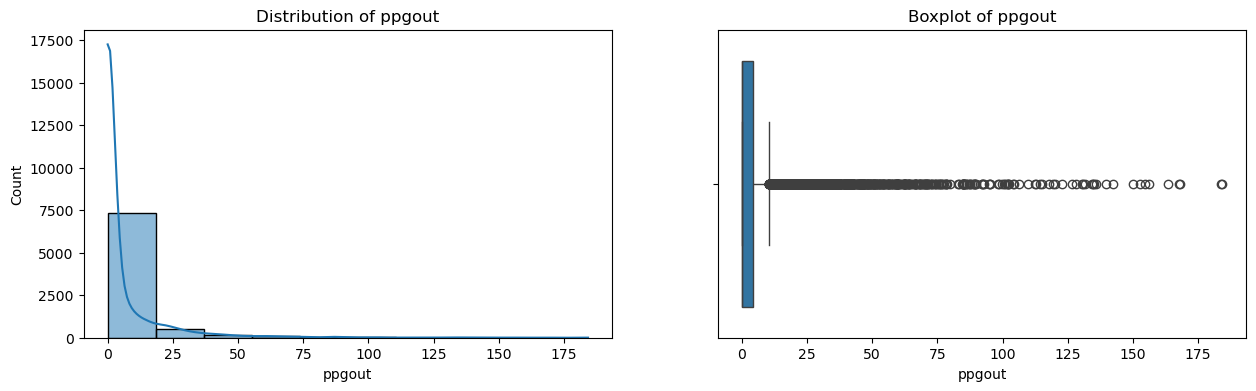

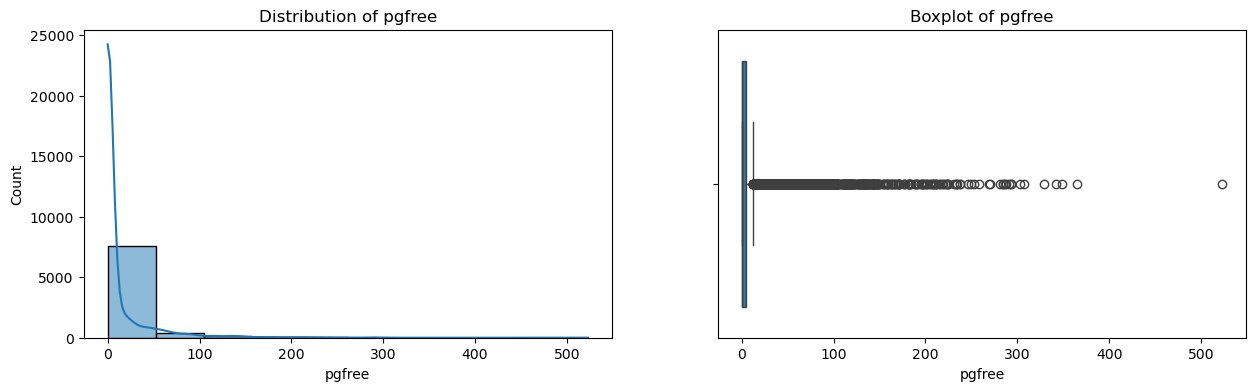

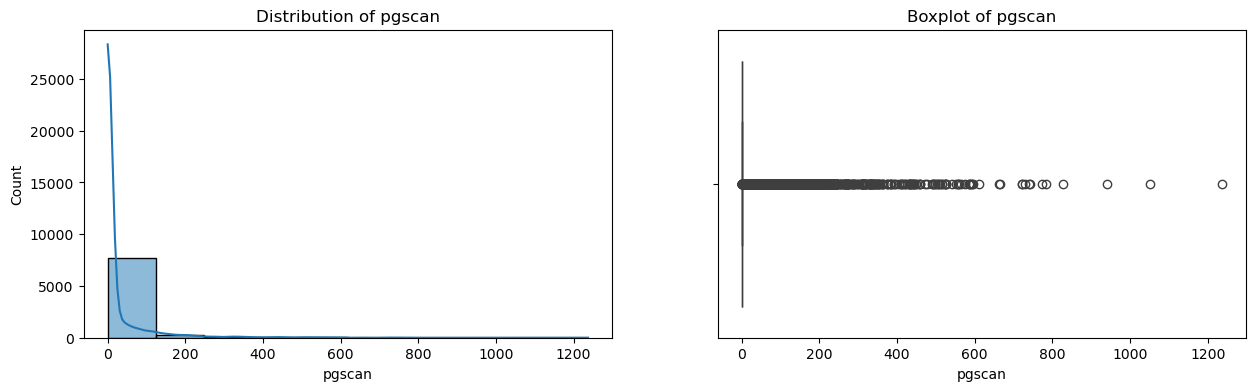

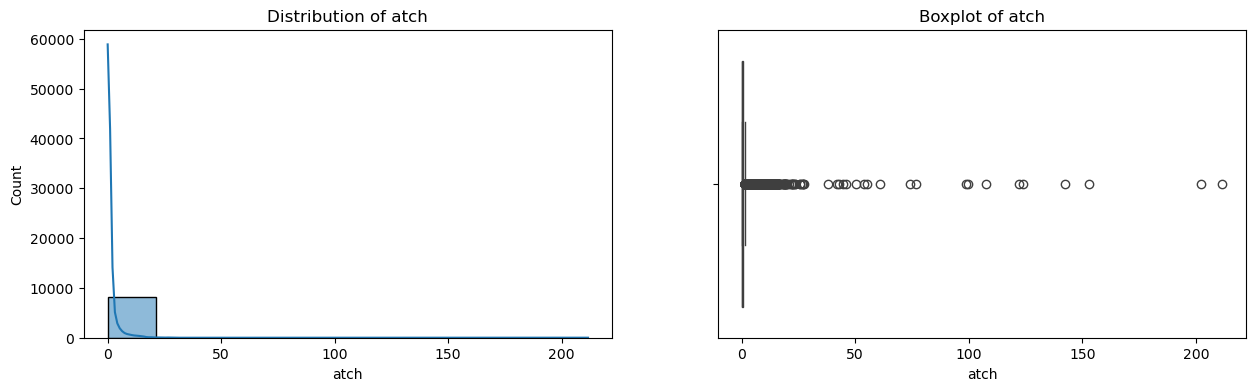

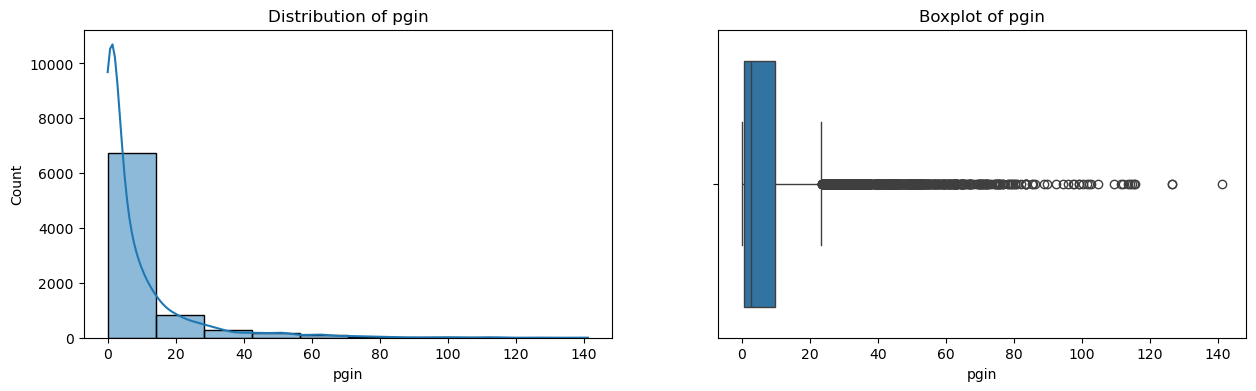

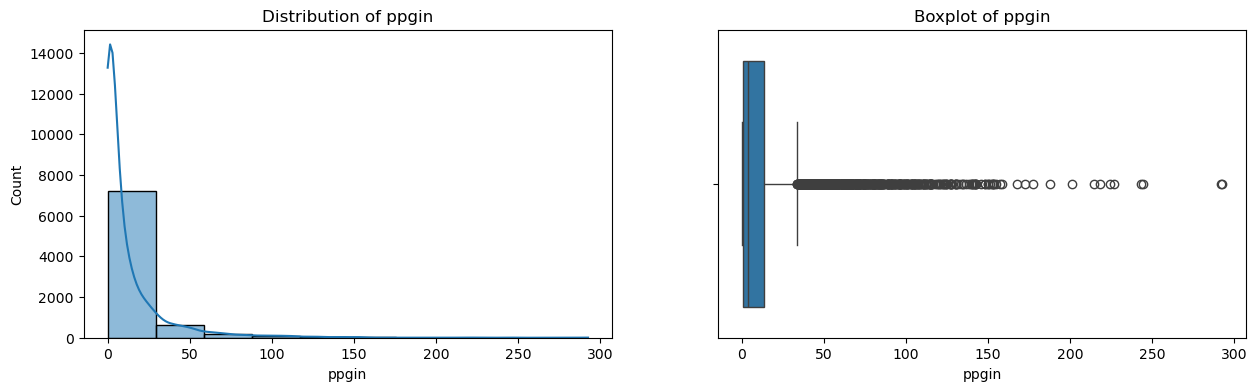

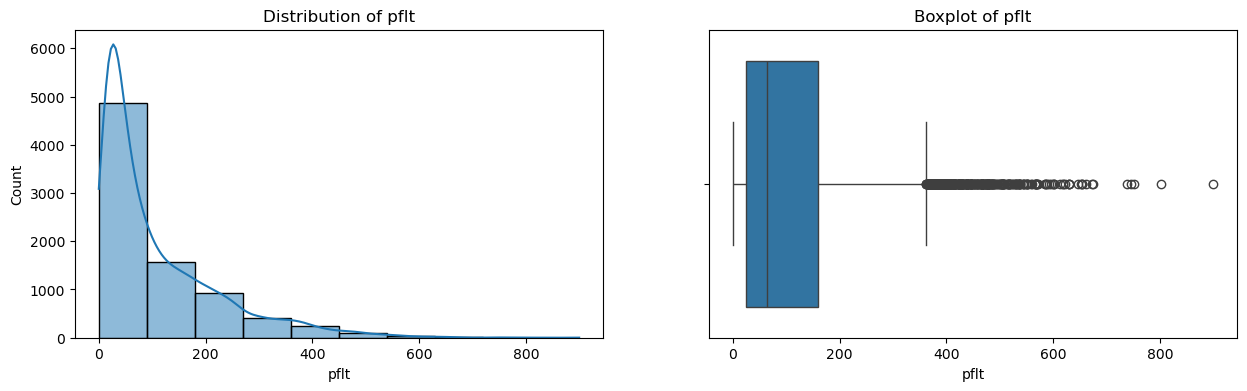

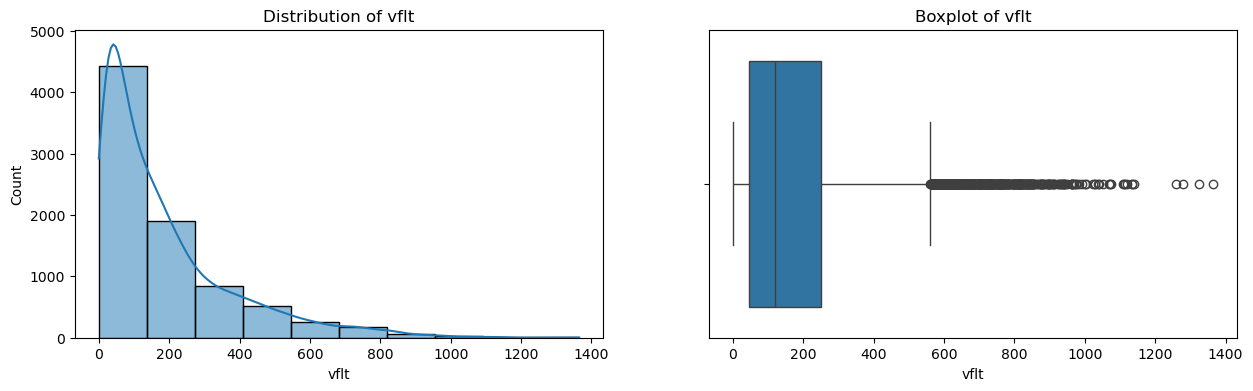

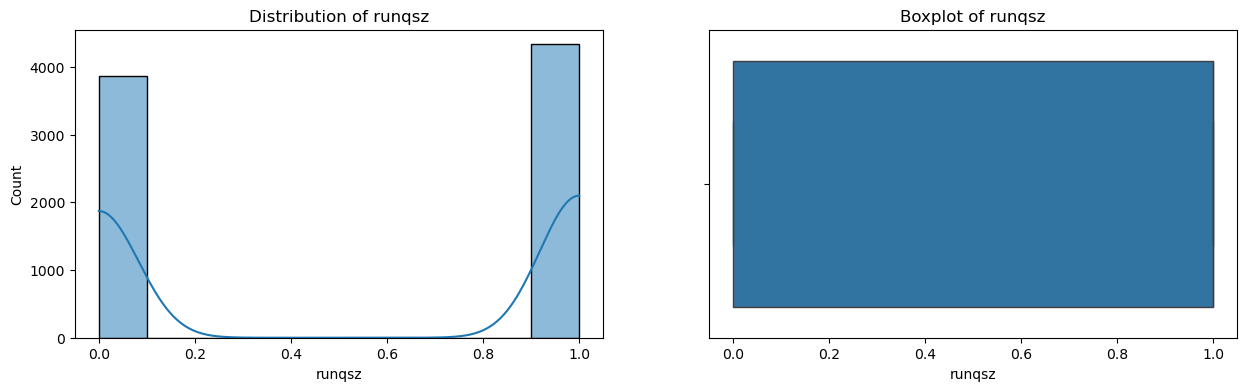

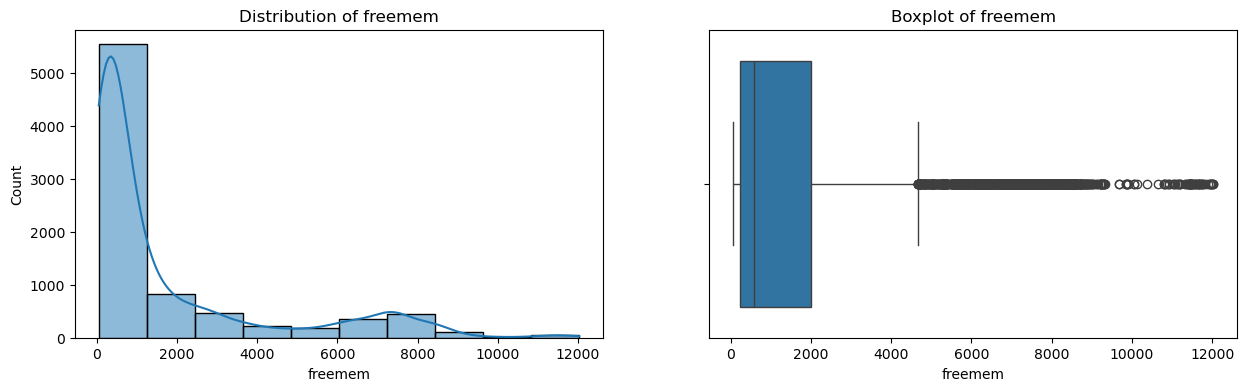

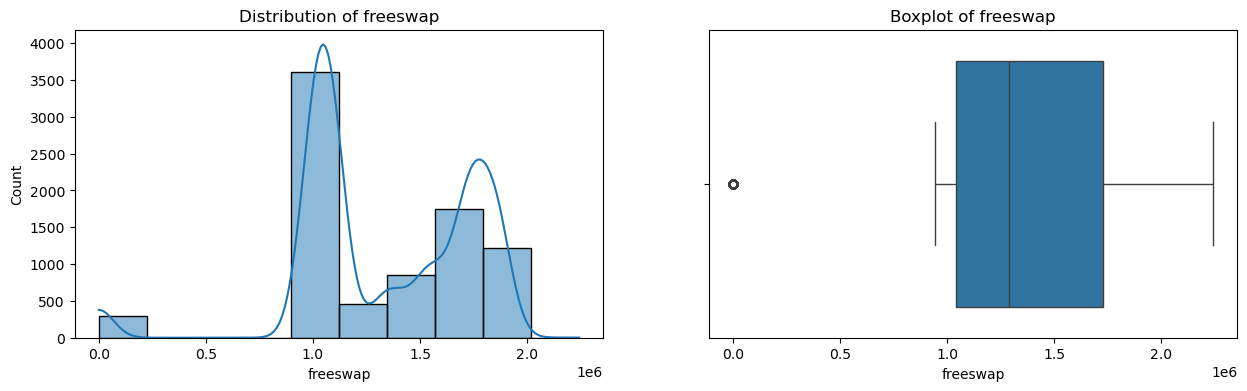

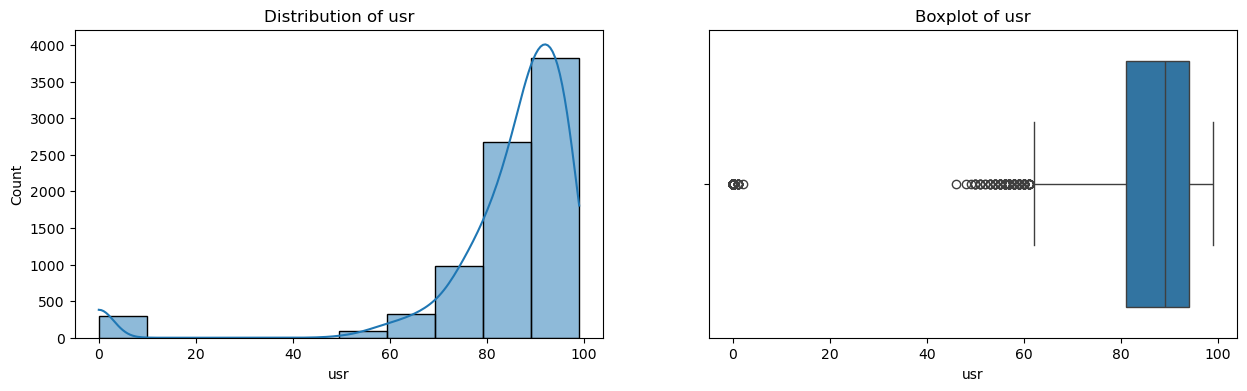

In [23]:
for col in df.select_dtypes(include=['int', 'float']).columns:
    print(col)
    print('Skew:', round(df[col].skew(), 2))
    
    # Plotting
    plt.figure(figsize=(15, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
plt.show()

In [24]:
rcParams['figure.figsize'] = 15,8

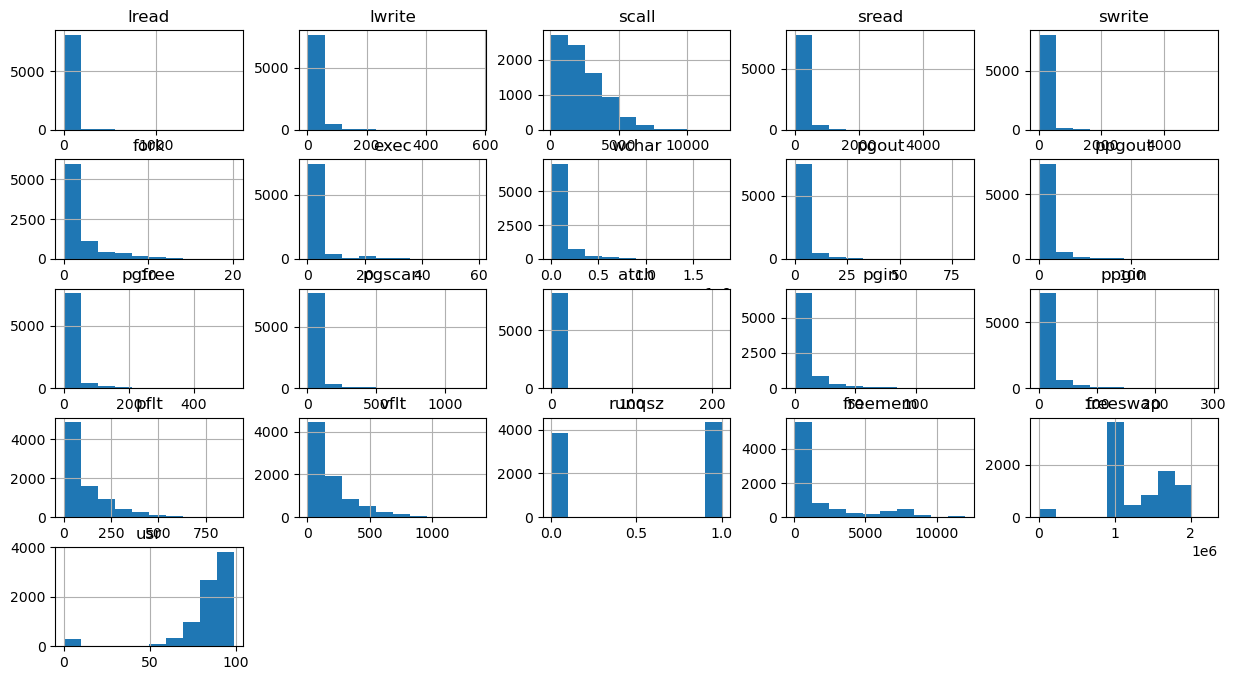

In [25]:
df[['lread','lwrite','scall','sread','swrite','fork','exec','wchar','pgout','ppgout','pgfree','pgscan','atch','pgin','ppgin','pflt','vflt','runqsz','freemem','freeswap','usr']].hist();

In [26]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'wchar',
       'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt',
       'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

# Bivariate Analysis

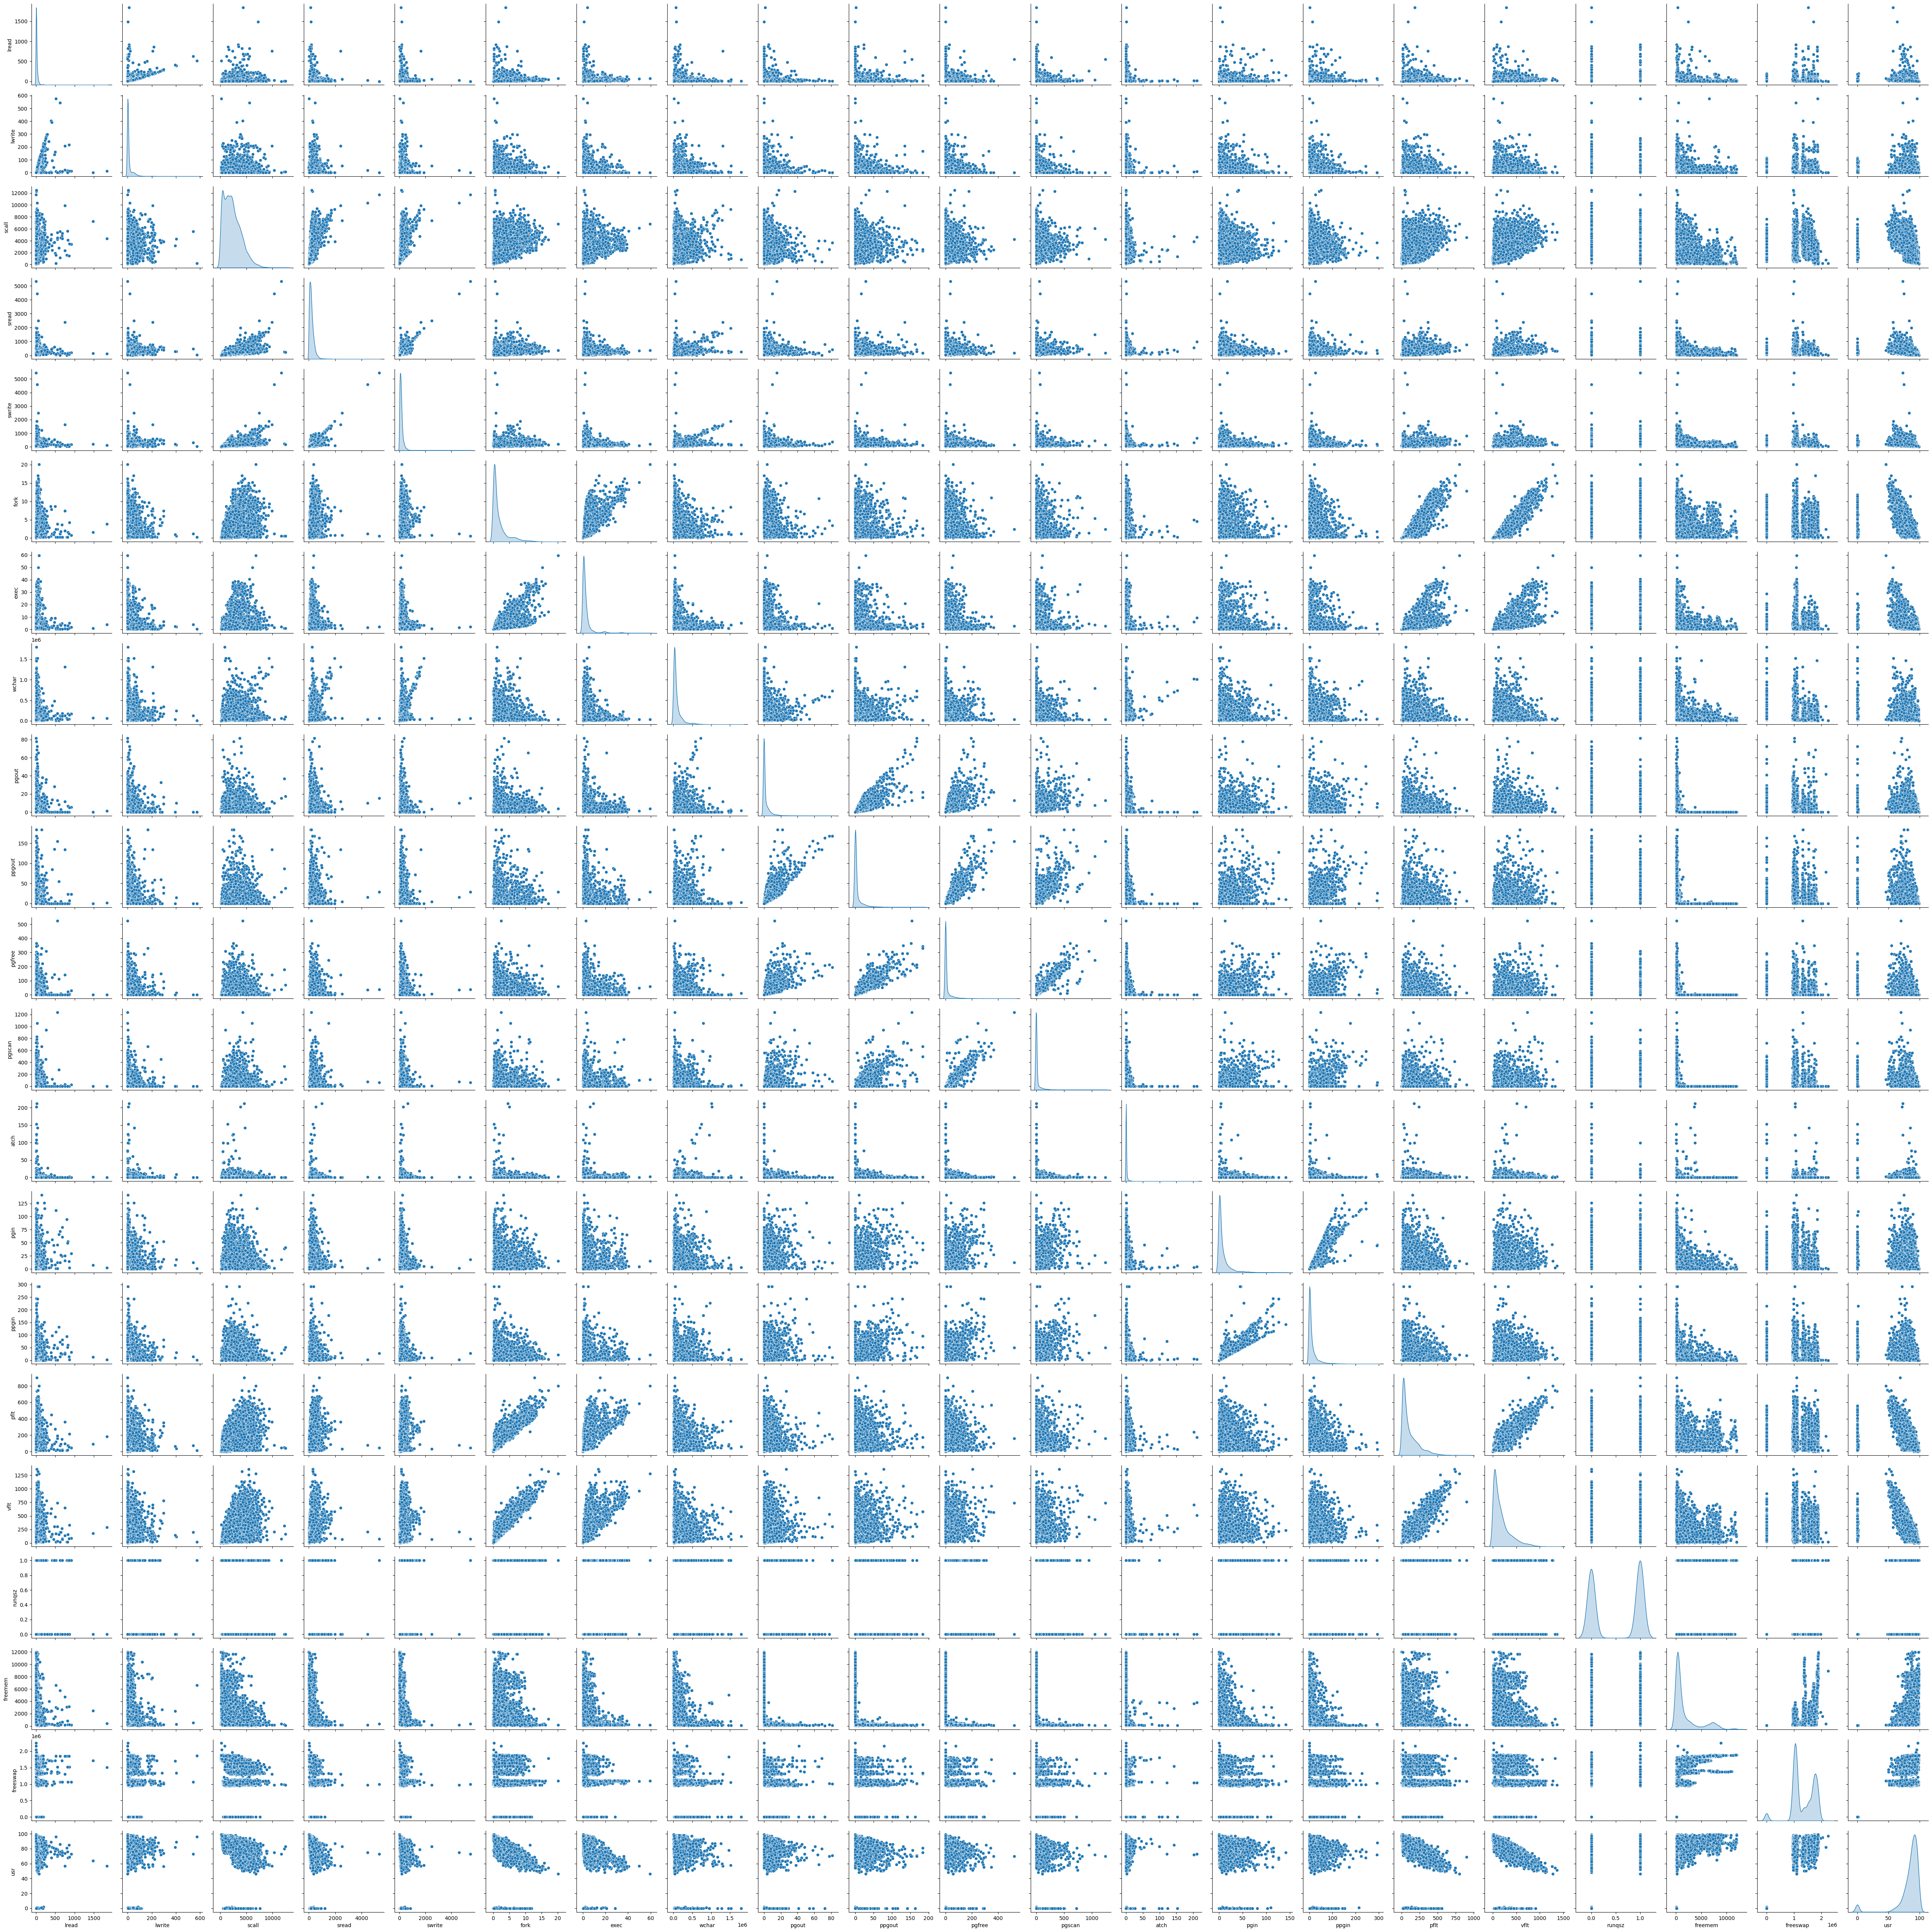

In [27]:
# Pair plot for all columns
sns.pairplot(df, diag_kind='kde')
plt.show()

# Heat map correlation

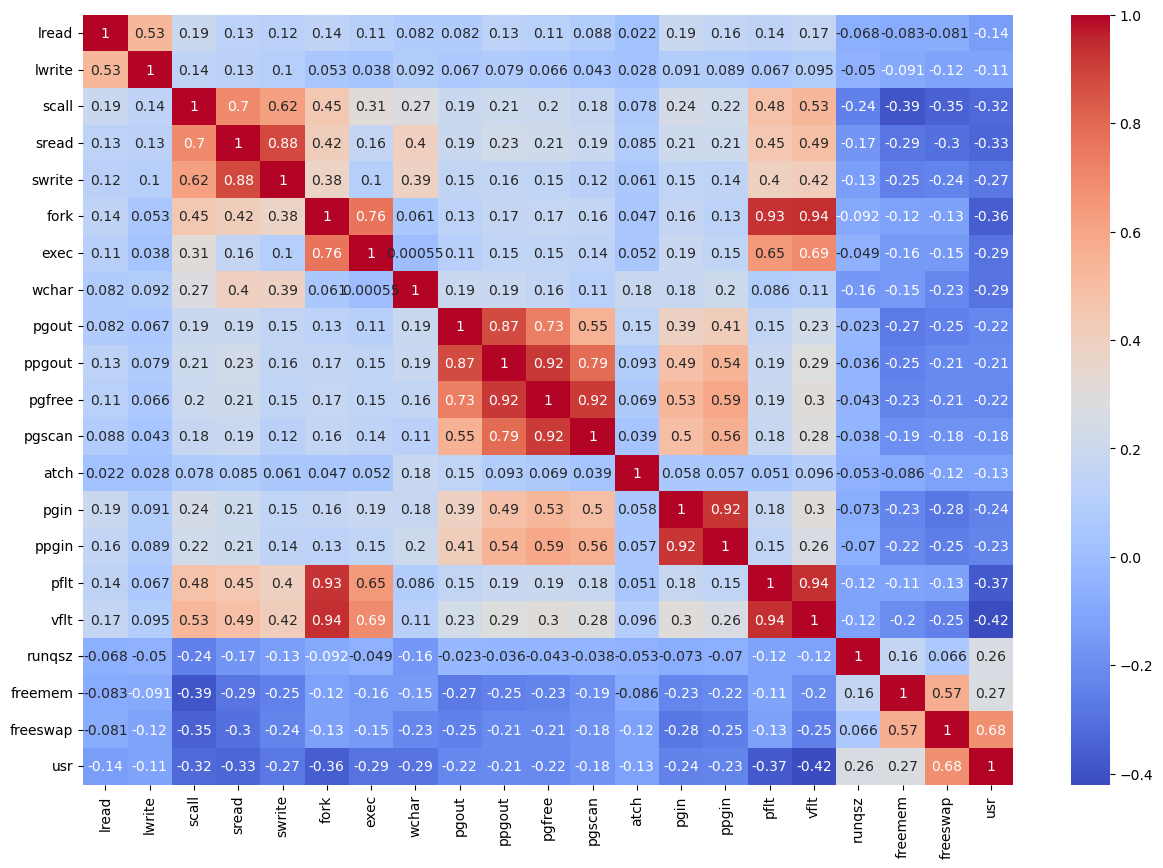

In [28]:
correlation_matrix =df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", ax=ax)
plt.show()

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

# In this variable we can't impute the median directly so we will apply the mode first in categorical variable

In [29]:
cols = ['runqsz']
for column in cols:
    print(column)
    mode_1 = df[column].mode()[0]
    print(mode_1)
    df[column].fillna(value=mode_1,inplace=True)
    
df.isnull().sum()

runqsz
1


lread        0
lwrite       0
scall        0
sread        0
swrite       0
fork         0
exec         0
wchar       15
pgout        0
ppgout       0
pgfree       0
pgscan       0
atch         0
pgin         0
ppgin        0
pflt         0
vflt         0
runqsz       0
freemem      0
freeswap     0
usr          0
dtype: int64

In [30]:
df.isnull().sum()

lread        0
lwrite       0
scall        0
sread        0
swrite       0
fork         0
exec         0
wchar       15
pgout        0
ppgout       0
pgfree       0
pgscan       0
atch         0
pgin         0
ppgin        0
pflt         0
vflt         0
runqsz       0
freemem      0
freeswap     0
usr          0
dtype: int64

In [31]:
df.isna().sum()

lread        0
lwrite       0
scall        0
sread        0
swrite       0
fork         0
exec         0
wchar       15
pgout        0
ppgout       0
pgfree       0
pgscan       0
atch         0
pgin         0
ppgin        0
pflt         0
vflt         0
runqsz       0
freemem      0
freeswap     0
usr          0
dtype: int64

In [32]:
zero_cols = df.columns[df.eq(0).any()]

In [33]:
df[zero_cols] = df[zero_cols].replace(0, np.nan)

In [34]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    wchar  pgout  ppgout  \
0    1.0     NaN   2147     79      68   0.2   0.2  53995.0    NaN     NaN   
1    NaN     NaN    170     18      21   0.2   0.2   8385.0    NaN     NaN   
2   15.0     3.0   2162    159     119   2.0   2.4  31950.0    NaN     NaN   
3    NaN     NaN    160     12      16   0.2   0.2   8670.0    NaN     NaN   
4    5.0     1.0    330     39      38   0.4   0.4  12185.0    NaN     NaN   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz  freemem  freeswap  \
0  ...     NaN   NaN   1.6    2.6   16.00   26.40     NaN     4670   1730946   
1  ...     NaN   NaN   NaN    NaN   15.63   16.83     1.0     7278   1869002   
2  ...     NaN   1.2   6.0    9.4  150.20  220.20     1.0      702   1021237   
3  ...     NaN   NaN   0.2    0.2   15.60   16.80     1.0     7248   1863704   
4  ...     NaN   NaN   1.0    1.2   37.80   47.60     1.0      633   1760253   

    usr  
0  95.0  
1  97.0  
2  87.0  
3  98.0  
4  90.0  

[5 rows x 21 columns]

# Simple Imputer

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
SI= SimpleImputer(strategy='median')
df=pd.DataFrame(SI.fit_transform(df),columns=df.columns)

In [37]:
df.head(10)

lread  lwrite   scall  sread  swrite  fork  exec     wchar  pgout  ppgout  \
0    1.0     5.0  2147.0   79.0    68.0   0.2   0.2   53995.0   3.59    6.99   
1    8.0     5.0   170.0   18.0    21.0   0.2   0.2    8385.0   3.59    6.99   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4   31950.0   3.59    6.99   
3    8.0     5.0   160.0   12.0    16.0   0.2   0.2    8670.0   3.59    6.99   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4   12185.0   3.59    6.99   
5    8.0     5.0  1201.0   65.0    61.0   0.4   0.4   58703.0   3.59    6.99   
6    1.0     5.0  5744.0  168.0   190.0   0.2   0.2  189975.0   6.00    8.80   
7   21.0    18.0  2799.0  291.0   211.0   0.6   0.4  259868.0   2.60    4.80   
8    8.0     5.0   264.0   42.0    33.0   0.2   0.2   10116.0   3.59    6.99   
9    8.0     5.0   188.0   13.0    24.0   0.2   0.2    6777.0   3.59    6.99   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz  freemem   freeswap  \
0  ...   57.96   0.8  1.60    2.6   16.00   26.40     1.0   4670.0  1730946.0   
1  ...   57.96   0.8  4.19    5.8   15.63   16.83     1.0   7278.0  1869002.0   
2  ...   57.96   1.2  6.00    9.4  150.20  220.20     1.0    702.0  1021237.0   
3  ...   57.96   0.8  0.20    0.2   15.60   16.80     1.0   7248.0  1863704.0   
4  ...   57.96   0.8  1.00    1.2   37.80   47.60     1.0    633.0  1760253.0   
5  ...   57.96   0.8  4.19    5.8   28.40   34.40     1.0   6854.0  1877461.0   
6  ...   57.96   4.4  0.60    0.6   27.40   28.60     1.0    312.0  1013458.0   
7  ...   57.96   0.8  1.00    1.0   35.40   71.00     1.0     87.0       13.0   
8  ...   57.96   0.8  0.40    0.8   15.63   18.44     1.0   1374.0  1749756.0   
9  ...   57.96   0.8  4.19    5.8   15.60   16.80     1.0   5310.0  1859912.0   

    usr  
0  95.0  
1  97.0  
2  87.0  
3  98.0  
4  90.0  
5  96.0  
6  89.0  
7  89.0  
8  98.0  
9  98.0  

[10 rows x 21 columns]

# Outliers detection

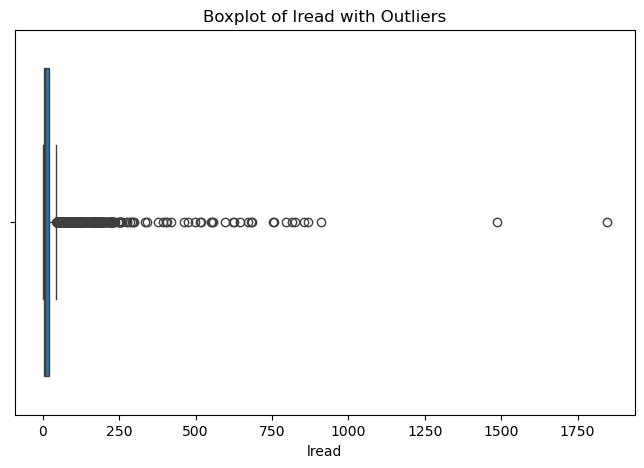

Proportion of outliers in lread: 9.86%


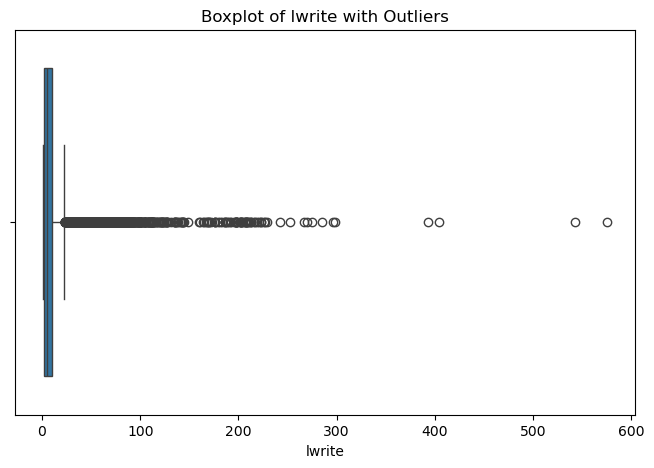

Proportion of outliers in lwrite: 17.00%


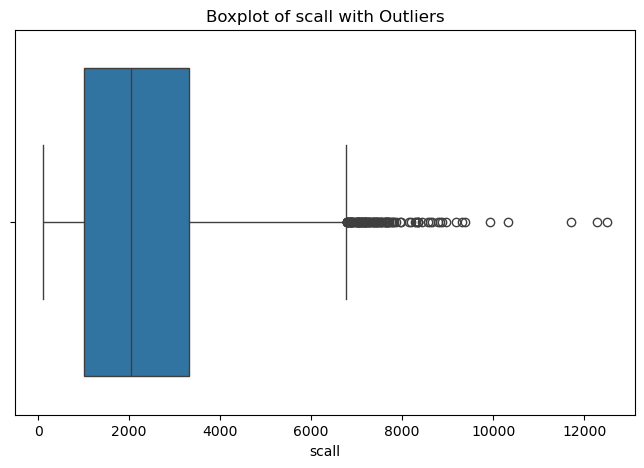

Proportion of outliers in scall: 1.32%


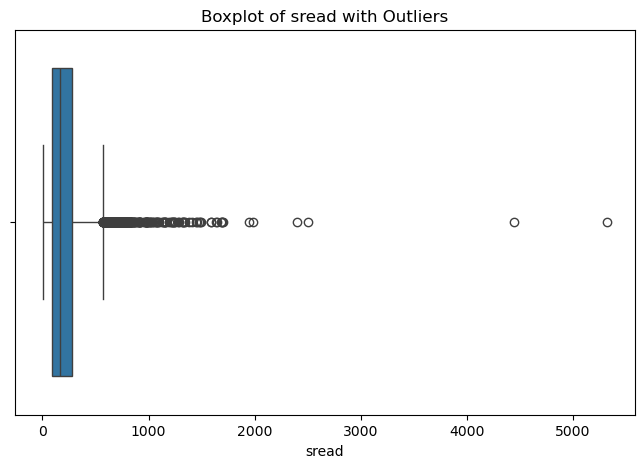

Proportion of outliers in sread: 4.15%


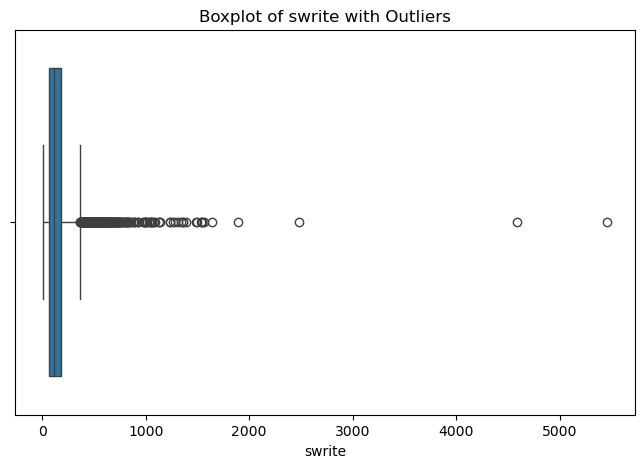

Proportion of outliers in swrite: 6.04%


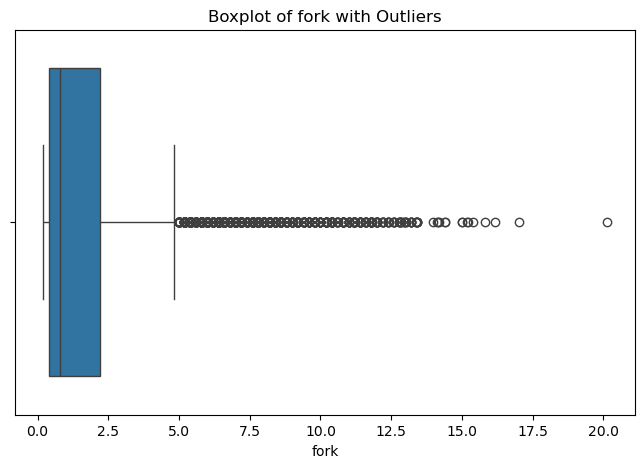

Proportion of outliers in fork: 11.51%


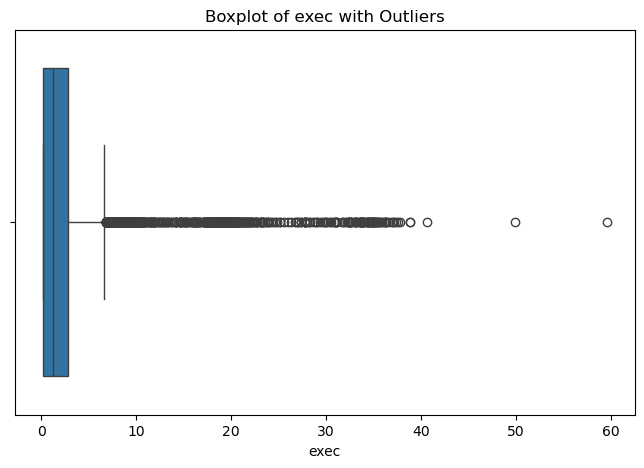

Proportion of outliers in exec: 8.67%


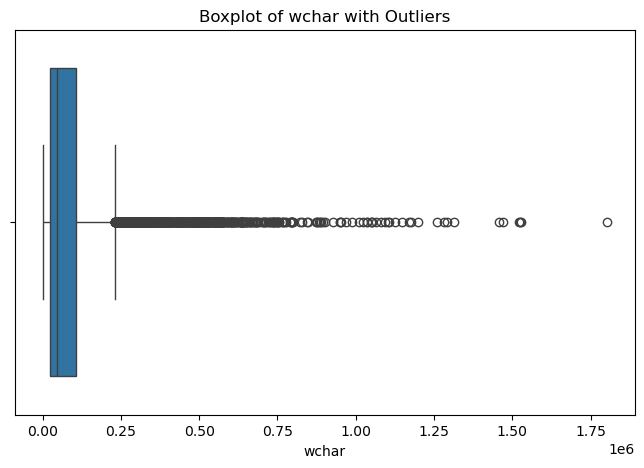

Proportion of outliers in wchar: 9.97%


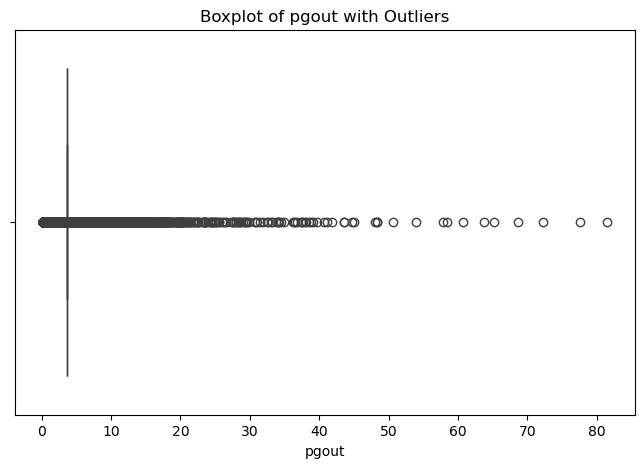

Proportion of outliers in pgout: 40.31%


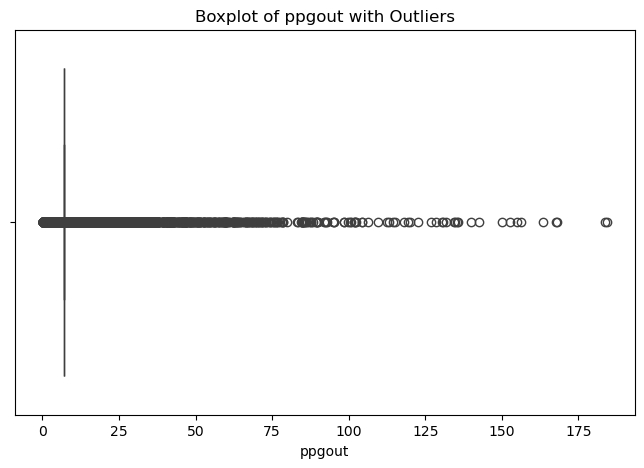

Proportion of outliers in ppgout: 40.37%


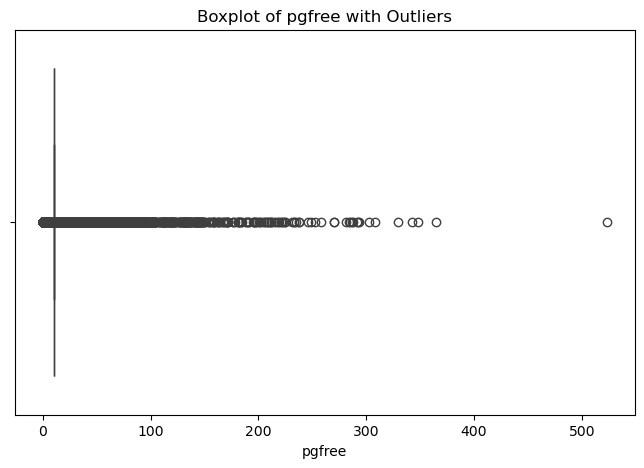

Proportion of outliers in pgfree: 40.43%


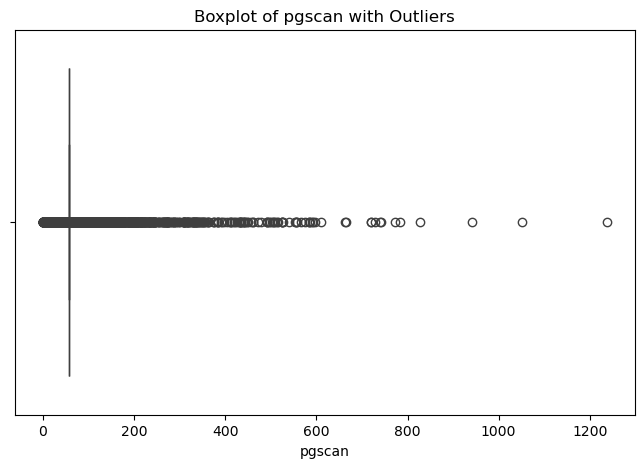

Proportion of outliers in pgscan: 21.29%


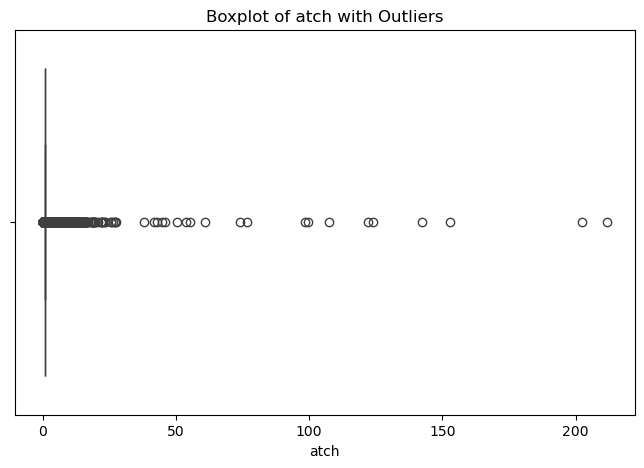

Proportion of outliers in atch: 40.65%


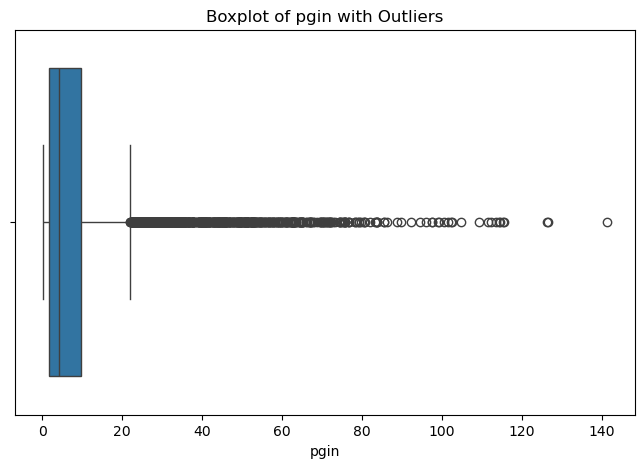

Proportion of outliers in pgin: 10.41%


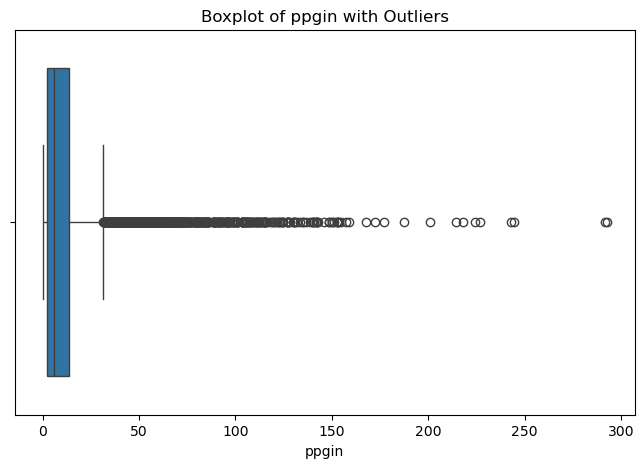

Proportion of outliers in ppgin: 10.89%


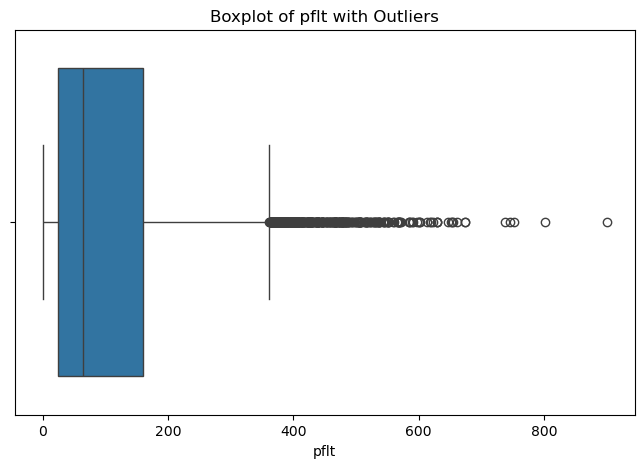

Proportion of outliers in pflt: 4.83%


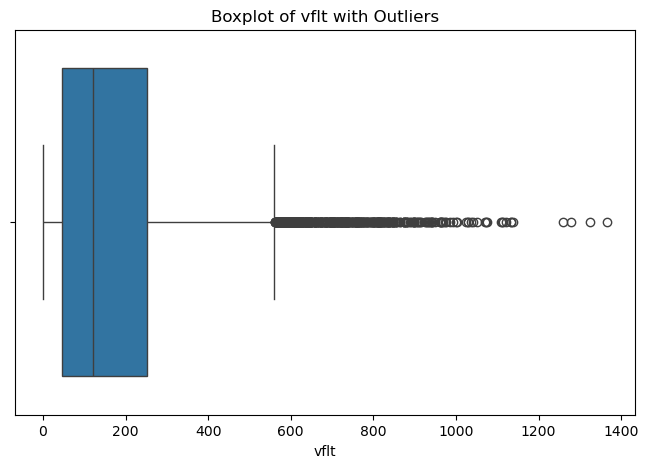

Proportion of outliers in vflt: 5.91%


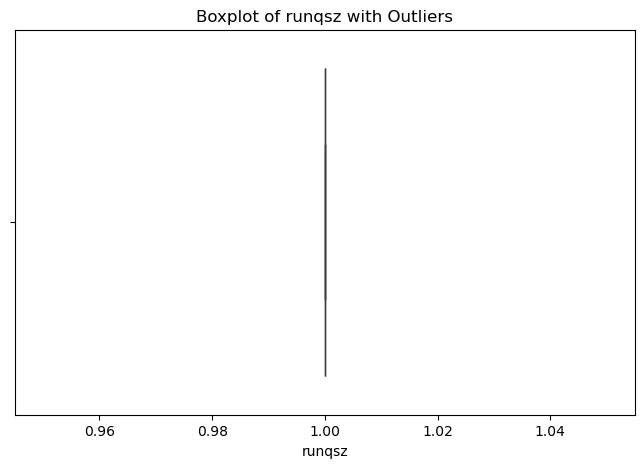

Proportion of outliers in runqsz: 0.00%


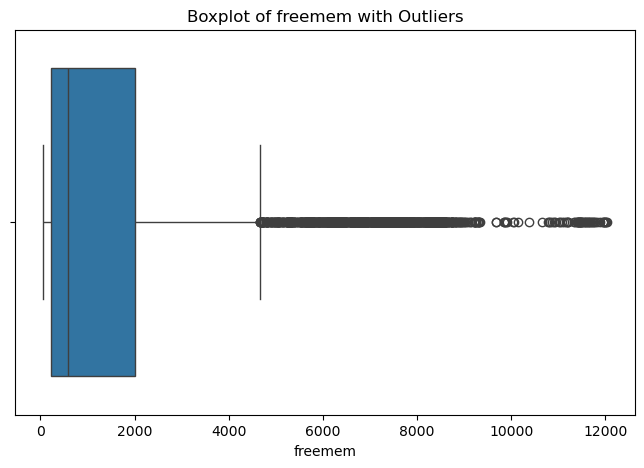

Proportion of outliers in freemem: 14.47%


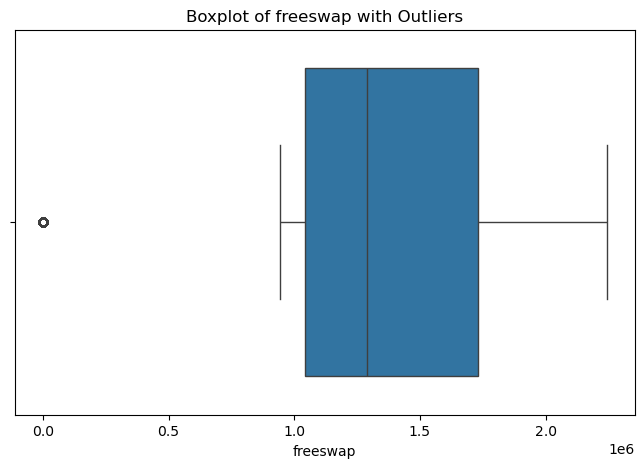

Proportion of outliers in freeswap: 3.59%


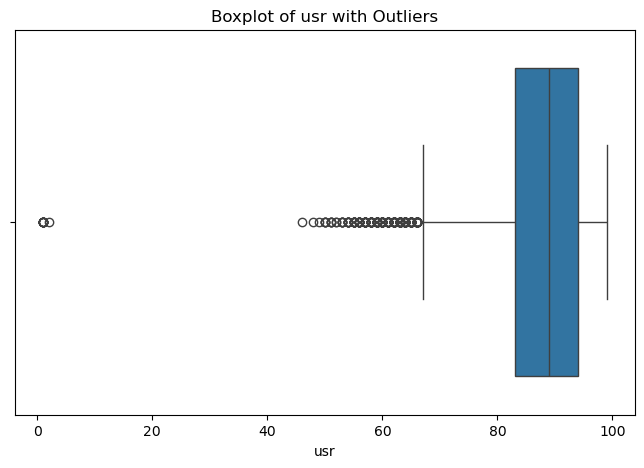

Proportion of outliers in usr: 3.59%


In [38]:
outlier_columns = df.select_dtypes(include=['int', 'float']).columns
for col in outlier_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} with Outliers')
    plt.show()
    
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    proportion_outliers = len(outliers) / len(df) * 100
    print(f"Proportion of outliers in {col}: {proportion_outliers:.2f}%")

In [39]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'wchar',
       'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt',
       'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

Proportion of outliers in lread: 9.86%
Proportion of outliers in lwrite: 17.00%
Proportion of outliers in scall: 1.32%
Proportion of outliers in sread: 4.15%
Proportion of outliers in swrite: 6.04%
Proportion of outliers in fork: 11.51%
Proportion of outliers in exec: 8.67%
Proportion of outliers in wchar: 9.97%
Proportion of outliers in pgout: 40.31%
Proportion of outliers in ppgout: 40.37%
Proportion of outliers in pgfree: 40.43%
Proportion of outliers in pgscan: 21.29%
Proportion of outliers in atch: 40.65%
Proportion of outliers in pgin: 10.41%
Proportion of outliers in ppgin: 10.89%
Proportion of outliers in pflt: 4.83%
Proportion of outliers in vflt: 5.91%
Proportion of outliers in runqsz: 0.00%
Proportion of outliers in freemem: 14.47%
Proportion of outliers in freeswap: 3.59%
Proportion of outliers in usr: 3.59%


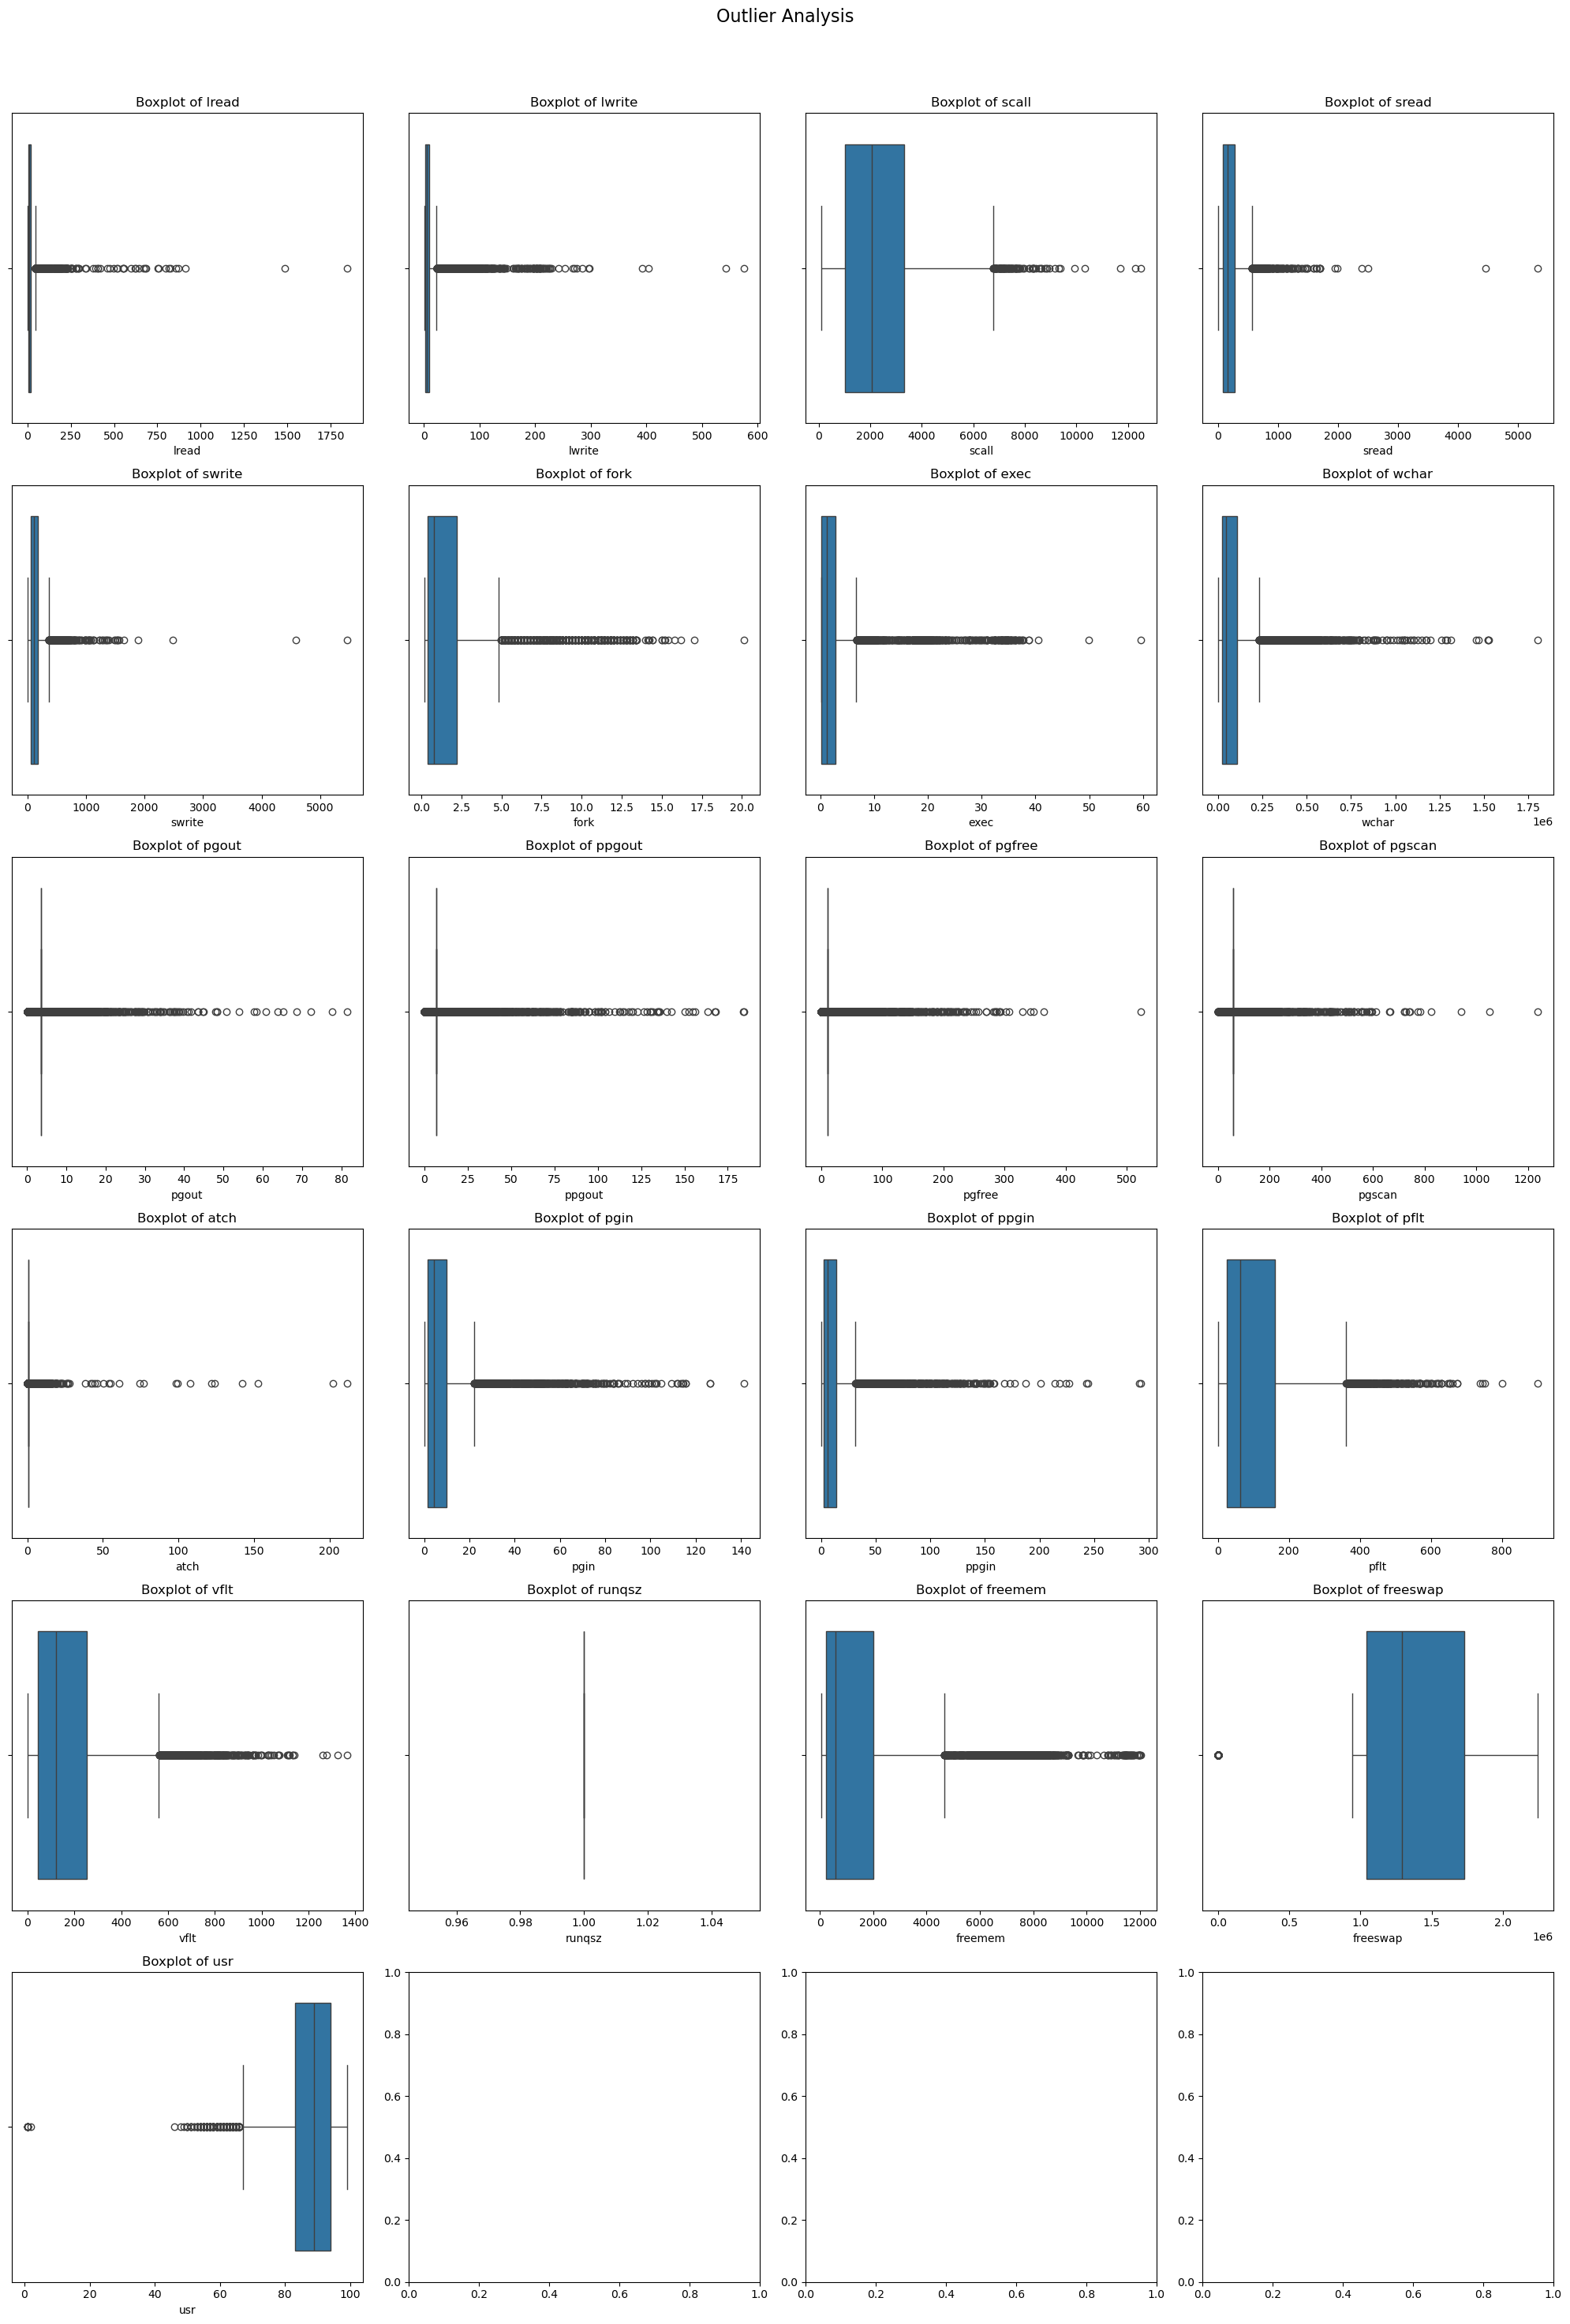

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

outlier_columns = df.select_dtypes(include=['int', 'float']).columns

num_rows = (len(outlier_columns) - 1) // 4 + 1
num_cols = min(len(outlier_columns), 4)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
fig.suptitle('Outlier Analysis', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(outlier_columns):
    
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    proportion_outliers = len(outliers) / len(df) * 100
    print(f"Proportion of outliers in {col}: {proportion_outliers:.2f}%")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Removal of outlier process

In [41]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [42]:
for column in df.columns:
    if df[column].dtype != 'object': 
            lr,ur=remove_outlier(df[column])
            df[column]=np.where(df[column]>ur,ur,df[column])
            df[column]=np.where(df[column]<lr,lr,df[column])

Proportion of outliers in lread: 0.00%
Proportion of outliers in lwrite: 0.00%
Proportion of outliers in scall: 0.00%
Proportion of outliers in sread: 0.00%
Proportion of outliers in swrite: 0.00%
Proportion of outliers in fork: 0.00%
Proportion of outliers in exec: 0.00%
Proportion of outliers in wchar: 0.00%
Proportion of outliers in pgout: 0.00%
Proportion of outliers in ppgout: 0.00%
Proportion of outliers in pgfree: 0.00%
Proportion of outliers in pgscan: 0.00%
Proportion of outliers in atch: 0.00%
Proportion of outliers in pgin: 0.00%
Proportion of outliers in ppgin: 0.00%
Proportion of outliers in pflt: 0.00%
Proportion of outliers in vflt: 0.00%
Proportion of outliers in runqsz: 0.00%
Proportion of outliers in freemem: 0.00%
Proportion of outliers in freeswap: 0.00%
Proportion of outliers in usr: 0.00%


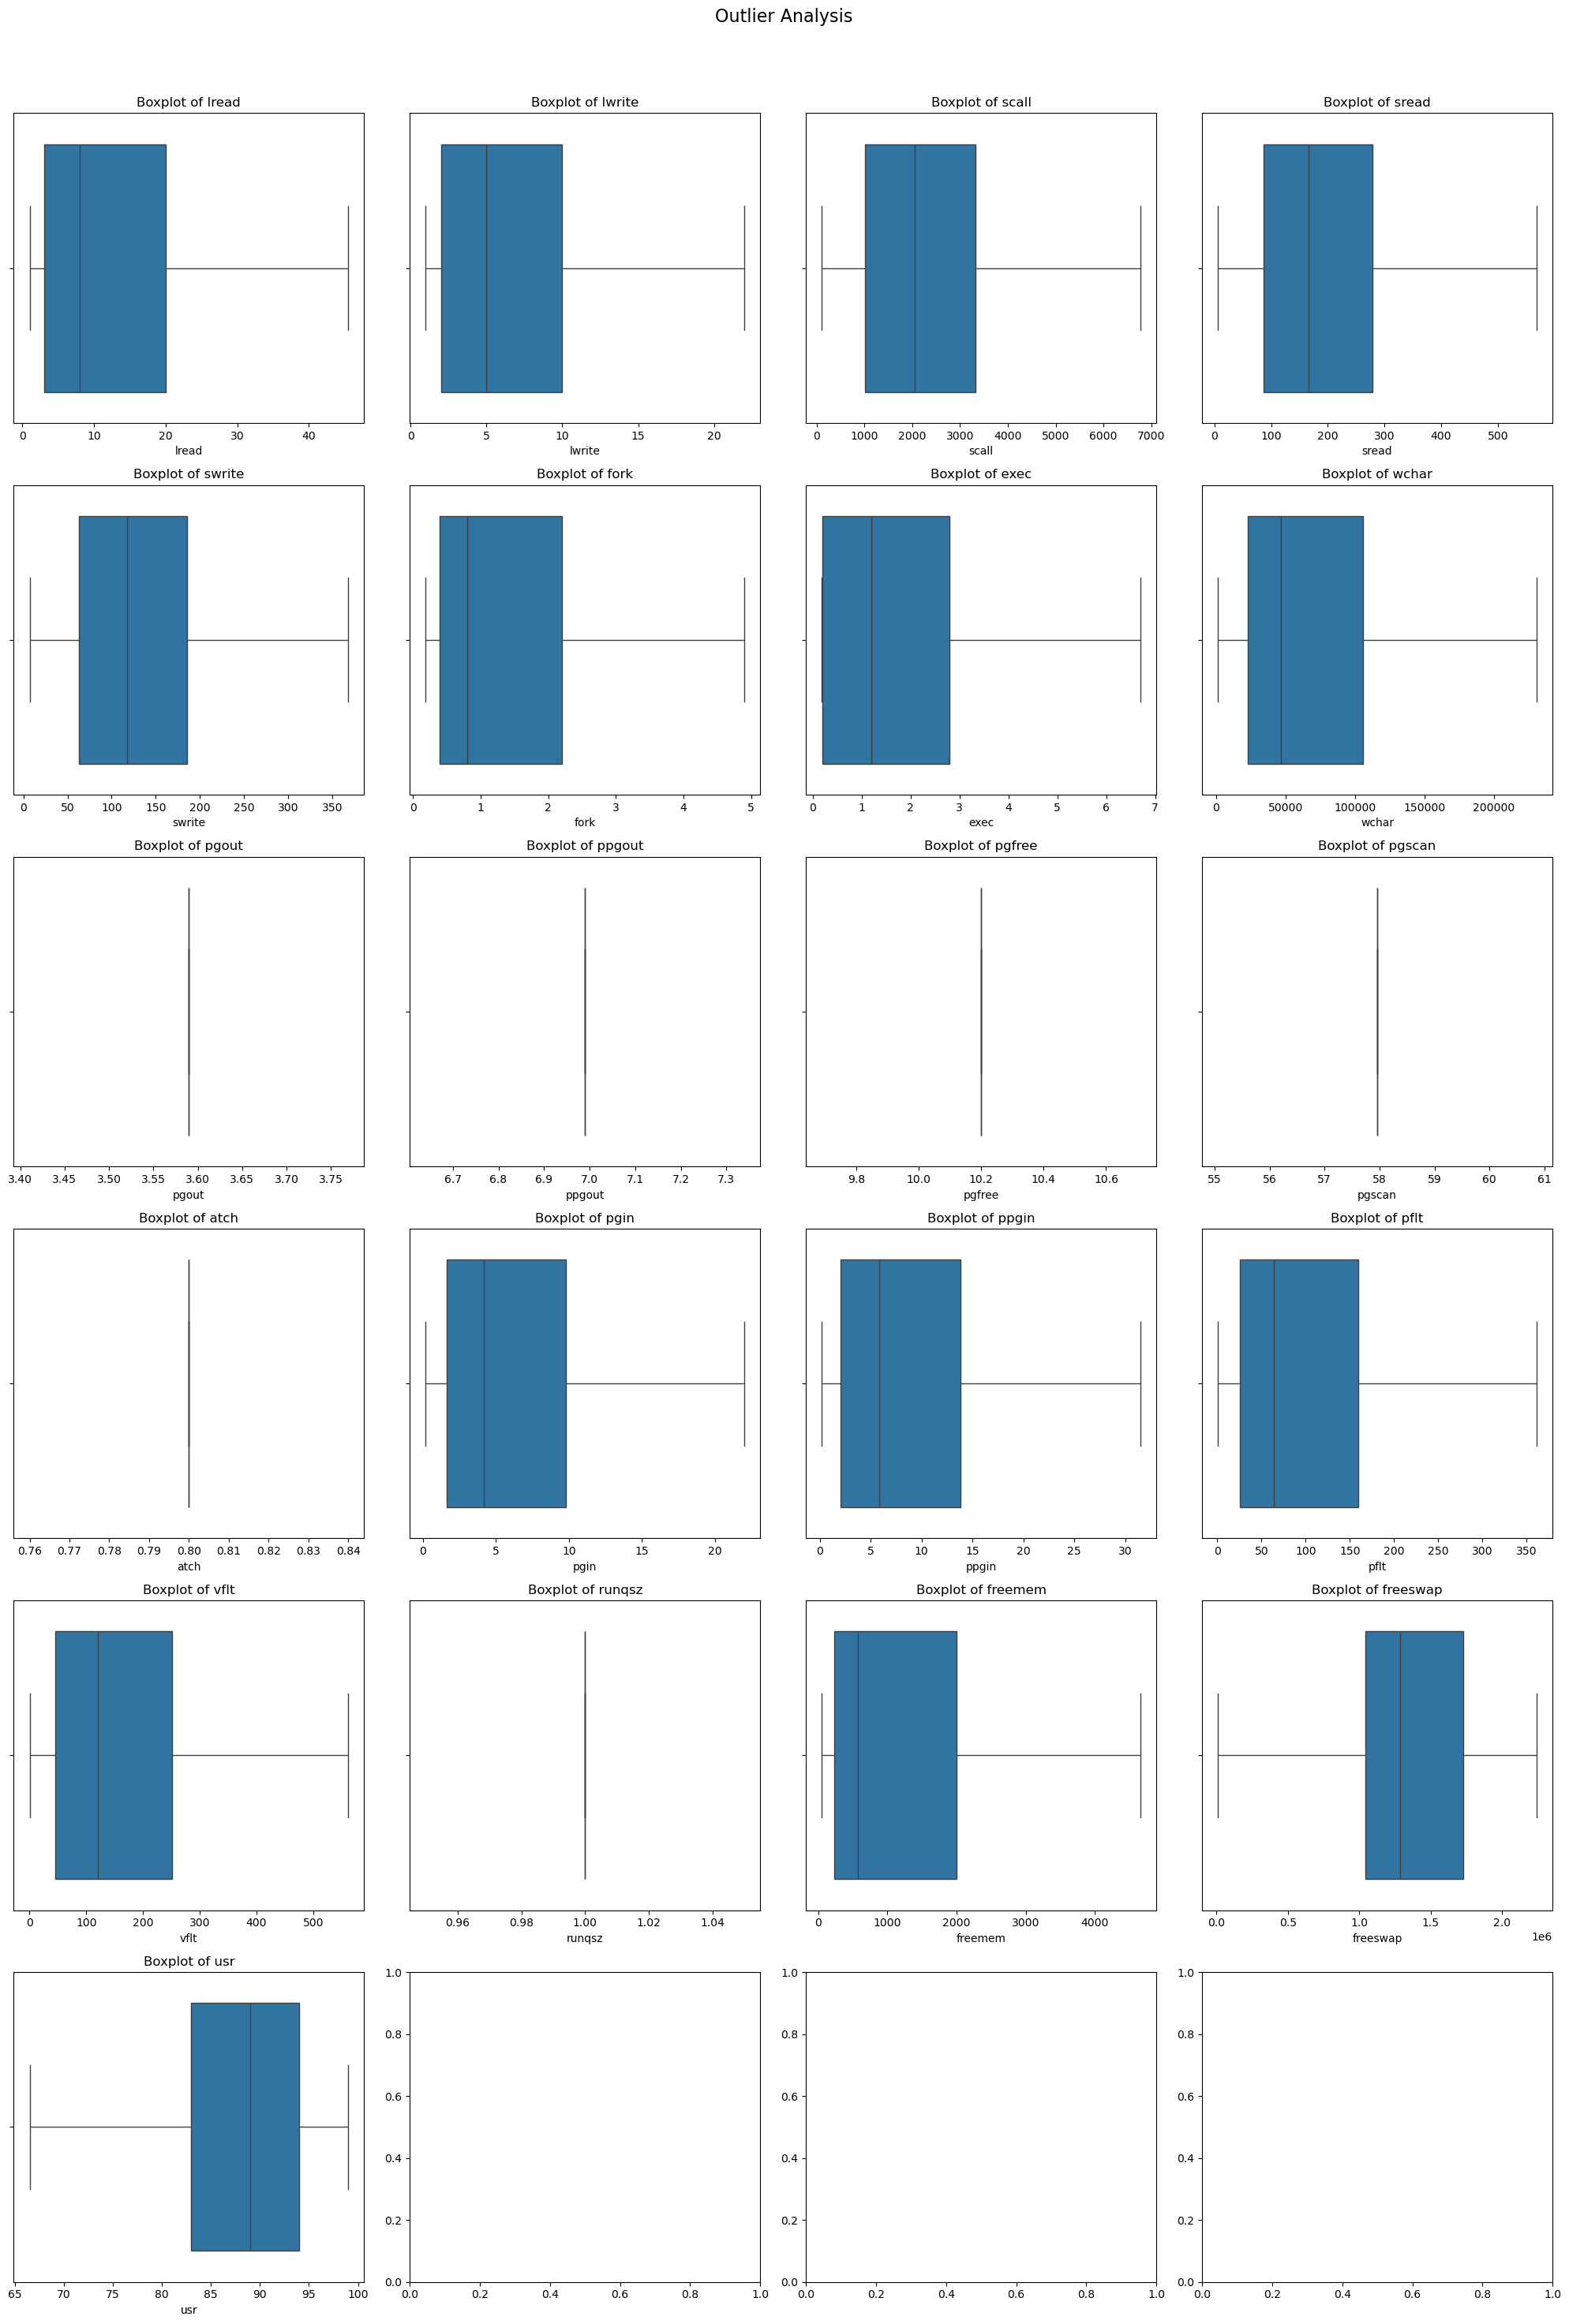

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

outlier_columns = df.select_dtypes(include=['int', 'float']).columns

# Adjust the number of rows and columns based on the number of outlier_columns
num_rows = (len(outlier_columns) - 1) // 4 + 1
num_cols = min(len(outlier_columns), 4)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
fig.suptitle('Outlier Analysis', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(outlier_columns):
    
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

    # Outlier detection and visualization
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    proportion_outliers = len(outliers) / len(df) * 100
    print(f"Proportion of outliers in {col}: {proportion_outliers:.2f}%")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Removal of outlier process based on some reasons

Impact on Model Performance: Ouliers are significantly affect the model performance, particularly those sensitive to extreme values,especially linear regression algorithm.It may lead skewed coefficients and less accurate predictions.

Outlier can introduce heteroscedasticity it leads to the violation of this affecting the precision of coefficient estimates.

Outlier are affected the model and it can give a non-linearity it leads to poor fitting model and biased coefficients
It can give a inaccurate prediction and outlier can make the model more challenging to interpretability.


# Check for duplicates

In [44]:
duplicates = df[df.duplicated()]

In [45]:
duplicates

Empty DataFrame
Columns: [lread, lwrite, scall, sread, swrite, fork, exec, wchar, pgout, ppgout, pgfree, pgscan, atch, pgin, ppgin, pflt, vflt, runqsz, freemem, freeswap, usr]
Index: []

[0 rows x 21 columns]

There is no Duplicates in our dataset

# 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

# Encode the data

In [46]:
df = pd.get_dummies(df, columns=['runqsz'], drop_first=True)

In [47]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'wchar',
       'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt',
       'vflt', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [48]:
df.head()

lread  lwrite   scall  sread  swrite  fork  exec    wchar  pgout  ppgout  \
0    1.0     5.0  2147.0   79.0    68.0   0.2   0.2  53995.0   3.59    6.99   
1    8.0     5.0   170.0   18.0    21.0   0.2   0.2   8385.0   3.59    6.99   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  31950.0   3.59    6.99   
3    8.0     5.0   160.0   12.0    16.0   0.2   0.2   8670.0   3.59    6.99   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  12185.0   3.59    6.99   

   pgfree  pgscan  atch  pgin  ppgin    pflt    vflt   freemem   freeswap  \
0    10.2   57.96   0.8  1.60    2.6   16.00   26.40  4659.125  1730946.0   
1    10.2   57.96   0.8  4.19    5.8   15.63   16.83  4659.125  1869002.0   
2    10.2   57.96   0.8  6.00    9.4  150.20  220.20   702.000  1021237.0   
3    10.2   57.96   0.8  0.20    0.2   15.60   16.80  4659.125  1863704.0   
4    10.2   57.96   0.8  1.00    1.2   37.80   47.60   633.000  1760253.0   

    usr  
0  95.0  
1  97.0  
2  87.0  
3  98.0  
4  90.0

In [49]:
#Train Test Split
X=df.drop(columns ='usr')
y=df.pop('usr')

In [50]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Overall Summary

In [51]:
X_train_sm=sm.add_constant(X_train)
ols_model=sm.OLS(y_train, X_train_sm).fit()

In [52]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2534.
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:15:29   Log-Likelihood:                -14603.
No. Observations:                5734   AIC:                         2.924e+04
Df Residuals:                    5719   BIC:                         2.934e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lread         -0.0334      0.006     -5.833      0.0

# VIF Factors

In [53]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

lread        4.021769
lwrite       3.339191
scall        2.902280
sread        5.185813
swrite       5.166778
fork        12.791100
exec         3.207212
wchar        1.305614
pgout        0.000022
ppgout       0.000003
pgfree       0.000122
pgscan       0.000000
atch         0.000005
pgin        12.337775
ppgin       12.166220
pflt        11.974923
vflt        15.524298
freemem      1.710002
freeswap     1.804070
dtype: float64



C:\ProgramData\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


VIF predictors are >2 are the multicollinearity data occured in the data

In [54]:
X_train.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'wchar',
       'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt',
       'vflt', 'freemem', 'freeswap'],
      dtype='object')

In [55]:
#1) Removing predictor 'accomodates' as VIF>5
X_train2 = X_train.drop(["fork"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.861 
Adjusted R-squared: 0.861


In [56]:
#2) Removing predictor 'beds' as VIF>5
X_train3 = X_train.drop(["pgin"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.861 
Adjusted R-squared: 0.861


In [57]:
#2) Removing predictor 'bedrooms' as VIF>5 
X_train4 = X_train.drop(["ppgin"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.861 
Adjusted R-squared: 0.86


In [58]:
#2) Removing predictor 'bedrooms' as VIF>5 
X_train5 = X_train.drop(["pflt"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)    

R-squared: 0.855 
Adjusted R-squared: 0.855


In [59]:
#2) Removing predictor 'bedrooms' as VIF>5 
X_train6 = X_train.drop(["vflt"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train6)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.855 
Adjusted R-squared: 0.855


In [60]:
#Let's drop the pgin and ppgin for the above OLS Summary

In [61]:
X_train.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'wchar',
       'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt',
       'vflt', 'freemem', 'freeswap'],
      dtype='object')

In [109]:
X_train_7 = X_train.drop(["pgin"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train_7)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2725.
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:24:04   Log-Likelihood:                -14608.
No. Observations:                5734   AIC:                         2.924e+04
Df Residuals:                    5720   BIC:                         2.934e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lread         -0.0331      0.006     -5.781      0.0

In [112]:
X_train_8 = X_train.drop(["lwrite"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train_8)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2728.
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:42:58   Log-Likelihood:                -14605.
No. Observations:                5734   AIC:                         2.924e+04
Df Residuals:                    5720   BIC:                         2.933e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lread         -0.0247      0.003     -7.749      0.0

In [63]:
# let's check the VIF of the predictors after removing'fork,pgin,ppgin'
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

lread        4.021769
lwrite       3.339191
scall        2.902280
sread        5.185813
swrite       5.166778
fork        12.791100
exec         3.207212
wchar        1.305614
pgout        0.000022
ppgout       0.000003
pgfree       0.000122
pgscan       0.000000
atch         0.000005
pgin        12.337775
ppgin       12.166220
pflt        11.974923
vflt        15.524298
freemem      1.710002
freeswap     1.804070
dtype: float64



C:\ProgramData\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [113]:
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2728.
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:43:06   Log-Likelihood:                -14605.
No. Observations:                5734   AIC:                         2.924e+04
Df Residuals:                    5720   BIC:                         2.933e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lread         -0.0247      0.003     -7.749      0.0

In [65]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_6.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_6.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
0           91.0      91.005400  -0.005400
1           94.0      95.517073  -1.517073
2           89.0      89.689126  -0.689126
3           83.0      83.567151  -0.567151
4           94.0      96.626101  -2.626101

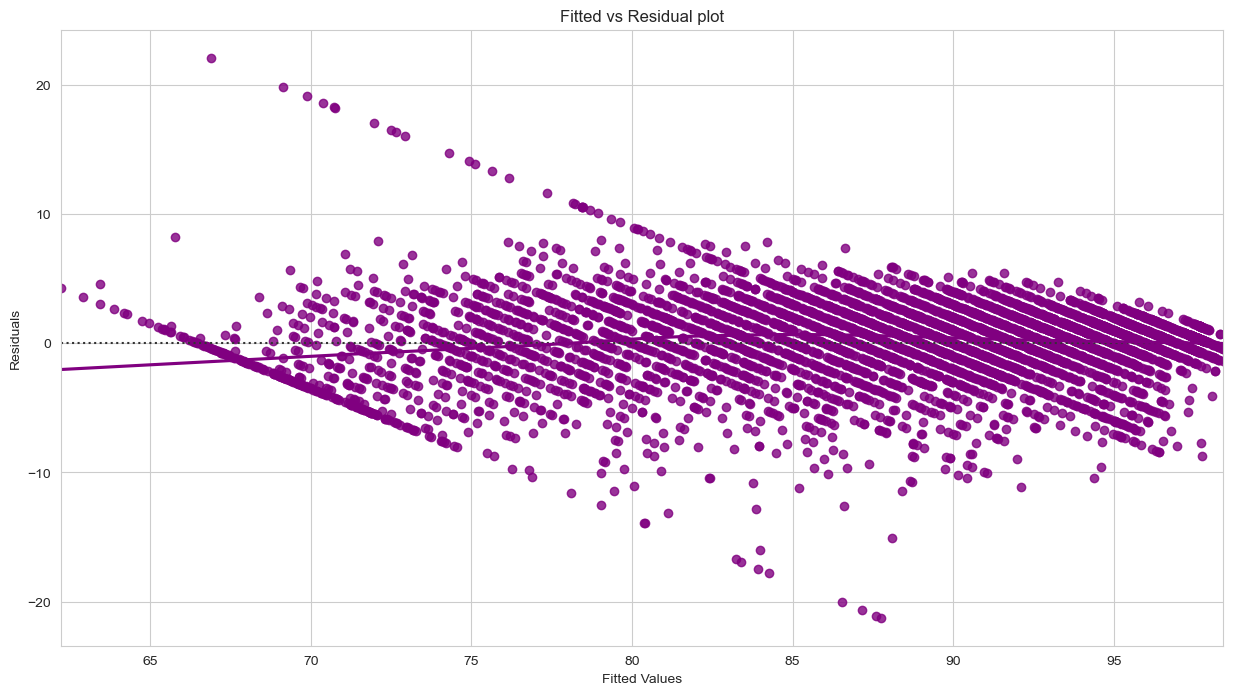

In [66]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

# No pattern in the data so the assumption in the linearity and assumption so its satisfied

In [67]:
from  scipy.stats import shapiro as sp
sp(df_pred["Residuals"])

C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9398130178451538, pvalue=2.788583944006386e-43)

# It's Greater than 0.05 (P-Value) so the it's not normal

# Homoscedasticity Test

In [68]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(df_pred["Residuals"], X_train)[1]

0.23193502249553993

## we can say the residuals are greater  so it's a homoscedasticity

In [69]:
olsres_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2534.
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:15:35   Log-Likelihood:                -14603.
No. Observations:                5734   AIC:                         2.924e+04
Df Residuals:                    5719   BIC:                         2.934e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lread         -0.0334      0.006     -5.833      0.000      -0.045      -0.022
lwrite         0.0185      0.010      1.824      0.068      -0.001       0.038
scall         -0.0013   4.35e-05    -30.233      0.000      -0.001      -0.001
sread         -0.0021      0.001     -3.382      0.001      -0.003      -0.001
swrite        -0.0043      0.001     -4.452      0.000      -0.006      -0.002
fork           0.3090      0.091      3.384      0.001       0.130       0.488
exec          -0.4544      0.036    -12.650      0.000      -0.525      -0.384
wchar      -7.329e-06   6.55e-07    -11.191      0.000   -8.61e-06   -6.05e-06
pgout          0.1015      0.000    483.760      0.000       0.101       0.102
ppgout         0.1977      0.000    483.760      0.000       0.197       0.198
pgfree         0.2885      0.001    483.760      0.000       0.287       0.290
pgscan         1.6392      0.003    483.760      0.000       1.633       1.646
atch           0.0226   4.68e-05    483.760      0.000       0.023       0.023
pgin          -0.0610      0.021     -2.944      0.003      -0.102      -0.020
ppgin         -0.0710      0.014     -5.023      0.000      -0.099      -0.043
pflt          -0.0214      0.001    -15.434      0.000      -0.024      -0.019
vflt          -0.0154      0.001    -15.673      0.000      -0.017      -0.013
freemem        0.0004   3.31e-05     13.133      0.000       0.000       0.000
freeswap   -1.213e-06   1.31e-07     -9.233      0.000   -1.47e-06   -9.56e-07
==============================================================================
Omnibus:                      816.260   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6725.322
Skew:                          -0.423   Prob(JB):                         0.00
Kurtosis:                       8.238   Cond. No.                     7.26e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.14e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [82]:
# Let us write the equation of linear regression
Equation = "log_price ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres_6.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres_6.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_6.params[i], "* (", X_train.columns[i], ")")

log_price = -0.033421629757615895 + 0.01845822971658384 * ( lwrite ) +  -0.0013137500346050096 * ( scall ) +  -0.002143102751372702 * ( sread ) +  -0.004288498652822636 * ( swrite ) +  0.3089989670480915 * ( fork ) +  -0.4543536118884632 * ( exec ) +  -7.329096321517276e-06 * ( wchar ) +  0.10152982340479916 * ( pgout ) +  0.19768620211686558 * ( ppgout ) +  0.28846913613619896 * ( pgfree ) +  1.6391834441621604 * ( pgscan ) +  0.022625030285192284 * ( atch ) +  -0.06100211354415358 * ( pgin ) +  -0.07103730846472647 * ( ppgin ) +  -0.021351955181910322 * ( pflt ) +  -0.015401056245094032 * ( vflt ) +  0.0004345525545789415 * ( freemem ) +  -1.2134212359893349e-06 * ( freeswap )


In [83]:
X_train.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'wchar',
       'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt',
       'vflt', 'freemem', 'freeswap'],
      dtype='object')

In [84]:
x_test.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'wchar',
       'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt',
       'vflt', 'freemem', 'freeswap'],
      dtype='object')

In [85]:
# dropping columns from the test data that are not there in the training data
x_test2 = x_test.drop(
    ['fork', 'pgin', 'ppgin'], axis=1
)

In [86]:
print("X_train shape:", X_train.shape)
print("x_test2 shape:", x_test.shape)

X_train shape: (5734, 19)
x_test2 shape: (2458, 19)


In [87]:
# let's make predictions on the test set
y_pred_test = olsres_6.predict(x_test)
y_pred_train = olsres_6.predict(X_train)

In [88]:
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [89]:
y_train.head()

694     91.0
5535    94.0
4244    89.0
2472    83.0
7052    94.0
Name: usr, dtype: float64

In [90]:
y_pred_train.head()

694     91.005400
5535    95.517073
4244    89.689126
2472    83.567151
7052    96.626101
dtype: float64

In [91]:
y_test.head()

3894    95.0
4276    95.0
3414    89.0
4165    80.0
7385    79.0
Name: usr, dtype: float64

In [92]:
y_pred_test.head()

3894    95.483563
4276    96.068425
3414    90.287622
4165    77.843720
7385    81.221941
dtype: float64

In [93]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse1

3.089036420686558

In [94]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse2

3.143920128957258

# Linear Regression using scikit learn

In [95]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [96]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,lr_model.coef_[idx]))

The coefficient for lread is -0.03342162975755825
The coefficient for lwrite is 0.018458229716677235
The coefficient for scall is -0.001313750034605298
The coefficient for sread is -0.0021431027513734288
The coefficient for swrite is -0.004288498652823567
The coefficient for fork is 0.3089989670478895
The coefficient for exec is -0.4543536118883841
The coefficient for wchar is -7.3290963214992365e-06
The coefficient for pgout is 5.551115123125783e-16
The coefficient for ppgout is -2.192690473634684e-15
The coefficient for pgfree is 2.7755575615628914e-17
The coefficient for pgscan is -1.6653345369377348e-16
The coefficient for atch is -2.7755575615628957e-17
The coefficient for pgin is -0.061002113544129315
The coefficient for ppgin is -0.07103730846474024
The coefficient for pflt is -0.021351955181915447
The coefficient for vflt is -0.015401056245087492
The coefficient for freemem is 0.0004345525545786602
The coefficient for freeswap is -1.2134212360073635e-06


In [121]:
y_pred = lr.predict(x_test)

In [122]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 9.884233777262724


In [123]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 2.2500544817871555


In [124]:
y_pred_train = lr.predict(X_train)

In [125]:
print("MSE",mean_squared_error(y_train,y_pred_train))

MSE 9.542146008328025


In [126]:
print("MAE",mean_absolute_error(y_train,y_pred_train))

MAE 2.2192887224943303


In [97]:
olsres_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2534.
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:01:15   Log-Likelihood:                -14603.
No. Observations:                5734   AIC:                         2.924e+04
Df Residuals:                    5719   BIC:                         2.934e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lread         -0.0334      0.006     -5.833      0.000      -0.045      -0.022
lwrite         0.0185      0.010      1.824      0.068      -0.001       0.038
scall         -0.0013   4.35e-05    -30.233      0.000      -0.001      -0.001
sread         -0.0021      0.001     -3.382      0.001      -0.003      -0.001
swrite        -0.0043      0.001     -4.452      0.000      -0.006      -0.002
fork           0.3090      0.091      3.384      0.001       0.130       0.488
exec          -0.4544      0.036    -12.650      0.000      -0.525      -0.384
wchar      -7.329e-06   6.55e-07    -11.191      0.000   -8.61e-06   -6.05e-06
pgout          0.1015      0.000    483.760      0.000       0.101       0.102
ppgout         0.1977      0.000    483.760      0.000       0.197       0.198
pgfree         0.2885      0.001    483.760      0.000       0.287       0.290
pgscan         1.6392      0.003    483.760      0.000       1.633       1.646
atch           0.0226   4.68e-05    483.760      0.000       0.023       0.023
pgin          -0.0610      0.021     -2.944      0.003      -0.102      -0.020
ppgin         -0.0710      0.014     -5.023      0.000      -0.099      -0.043
pflt          -0.0214      0.001    -15.434      0.000      -0.024      -0.019
vflt          -0.0154      0.001    -15.673      0.000      -0.017      -0.013
freemem        0.0004   3.31e-05     13.133      0.000       0.000       0.000
freeswap   -1.213e-06   1.31e-07     -9.233      0.000   -1.47e-06   -9.56e-07
==============================================================================
Omnibus:                      816.260   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6725.322
Skew:                          -0.423   Prob(JB):                         0.00
Kurtosis:                       8.238   Cond. No.                     7.26e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.14e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [98]:
intercept = lr_model.intercept_

In [99]:
intercept

99.71387625526799

In [100]:
# R square on testing data
lr_model.score(x_test, y_test)

0.843846041301211

In [103]:
from sklearn import metrics

#RMSE on Training data
predicted_train=lr_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

3.0890364206865586

In [104]:
#RMSE on Testing data
predicted_test=lr_model.fit(X_train, y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

3.1439201289572742

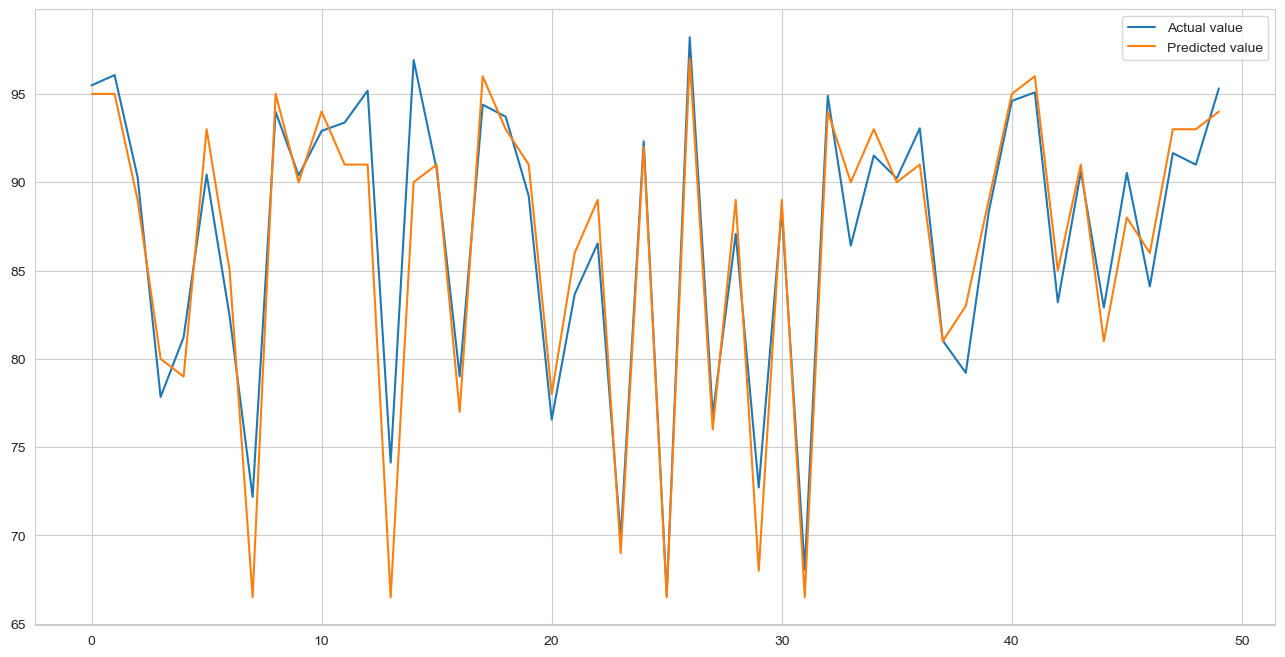

In [115]:
test = pd.DataFrame({'Predicted value':predicted_test, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

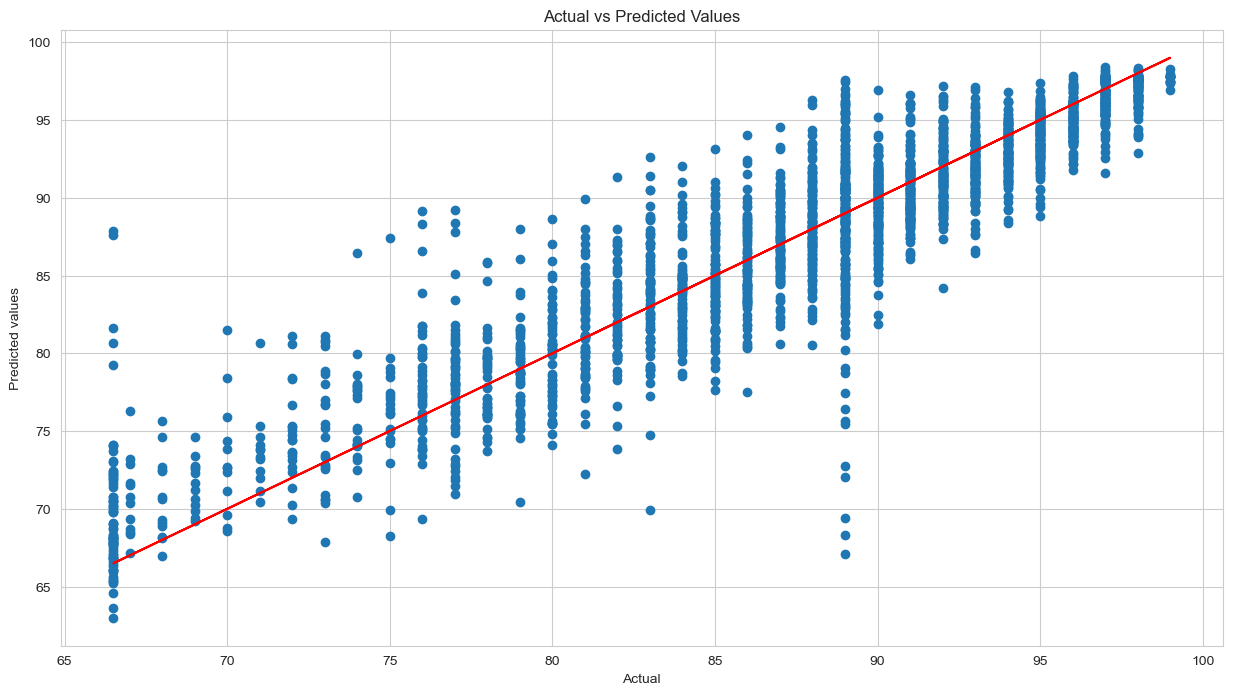

<Figure size 5000x5000 with 0 Axes>

In [117]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_lm = lr.predict(x_test)

# Our predictions
plt.scatter(y_test,pred_lm)

# Perfect predictions
plt.plot(y_test,y_test,'r');
plt.xlabel('Actual')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.figure(figsize = (50,50))
sns.set(font_scale=2);